In [1]:
import os
os.listdir()

['.ipynb_checkpoints',
 'cluster-wise-dfs.pickle',
 'df-new-features.pickle',
 'exp-wa-past-values-dfs.pickle',
 'exp-wa-past-values-week-days-dfs.pickle',
 'feature extraction for regression.ipynb',
 'feb-2016-groupby.csv',
 'feb-2016-outliers-removed.csv',
 'feb-2016-smooth.pickle',
 'jan-2016-groupby.csv',
 'jan-2016-outliers-removed.csv',
 'jan-2016-smooth.pickle',
 'mar-2016-groupby.csv',
 'mar-2016-outliers-removed.csv',
 'mar-2016-smooth.pickle',
 'march-2016-groupby.csv',
 'march-2016-outliers-removed.csv',
 'mydask.png',
 'NYC Final.ipynb',
 'Regression models.ipynb',
 'rf-fi.pickle']

In [141]:
import pickle
with open('nans-included-all-features.pickle', 'rb') as f:
    dfs=pickle.load(f)

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
dfs[0].columns

Index(['Prediction', 'EA_P1_Predicted', 'EA_P1_Error', '0', '1', '2', '3', '4',
       '5', '6', 'last_week_pred', 'previous_day_pred', 'p_1', 'p_2', 'p_3',
       'p_4', 'p_5', 'max_last_5', 'min_last_5', 'std_dev_10', 'component_1',
       'component_2', 'component_3', 'component_4', 'component_5',
       'component_6', 'component_7', 'component_8', 'component_9',
       'component_10', 'component_11', 'component_12'],
      dtype='object')

In [136]:
# for df in dfs:
#     df.drop(['last_week_pred', 'previous_day_pred', 'max_last_5', 'min_last_5', 'std_dev_10', 'component_1',
#        'component_2', 'component_3', 'component_4', 'component_5',
#        'component_6', 'component_7', 'component_8', 'component_9',
#        'component_10', 'component_11', 'component_12'], axis=1, inplace=True)

In [142]:
for df in dfs:
    df.dropna(inplace=True)

In [143]:
# train:cv:test :: 64:16:20 for each region
x_trains=[]
x_cvs=[]
x_tests=[]

y_trains=[]
y_cvs=[]
y_tests=[]

for r in range(40):
    X=dfs[r].drop(['Prediction', 'EA_P1_Error'], axis=1)
#     X=dfs[r]
    y=dfs[r]['Prediction']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)
    X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, shuffle=False)
    
    x_trains.append(X_train)
    y_trains.append(y_train)
    
    x_cvs.append(X_cv)
    y_cvs.append(y_cv)
    
    x_tests.append(X_test)
    y_tests.append(y_test)

In [80]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [81]:
import matplotlib.pyplot as plt
import numpy as np

## Linear regression

In [83]:
from pylab import rcParams
rcParams['figure.figsize']=16,8

In [84]:
def get_mse(predictions, truth):
    return np.mean((predictions-truth)**2)

In [85]:
def get_mape(predictions, truth):
    return 100*np.sum(np.abs(predictions-truth))/np.sum(truth)

In [139]:
get_mape(x_trains[0]['EA_P1_Predicted'], y_trains[0])

14.330757837025246

In [95]:
import warnings
warnings.filterwarnings('ignore')

test data mse for region 0 = 1350.9026315131237
test data mape for region 0 = 42.91173240663346



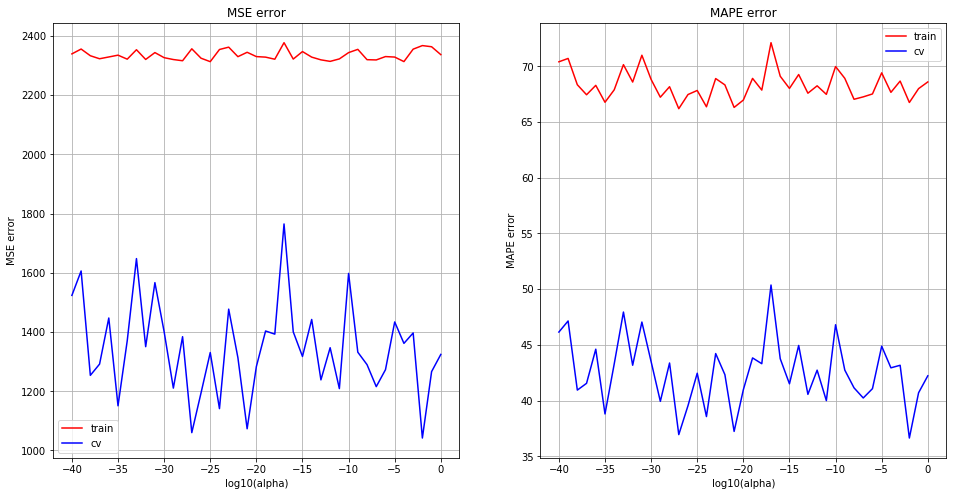

************************************************************************************************************************

test data mse for region 1 = 1801.4241612749593
test data mape for region 1 = 51.689670344908706



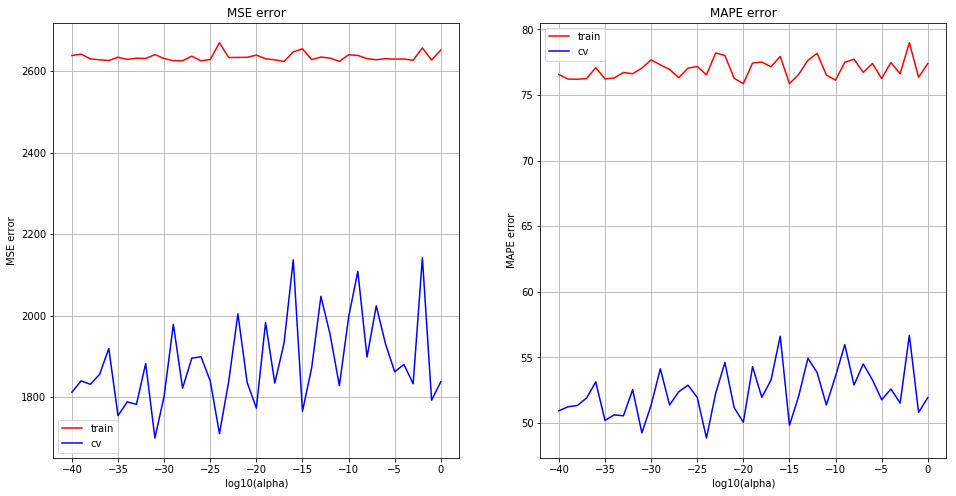

************************************************************************************************************************

test data mse for region 2 = 1397.174078908796
test data mape for region 2 = 45.28041563651896



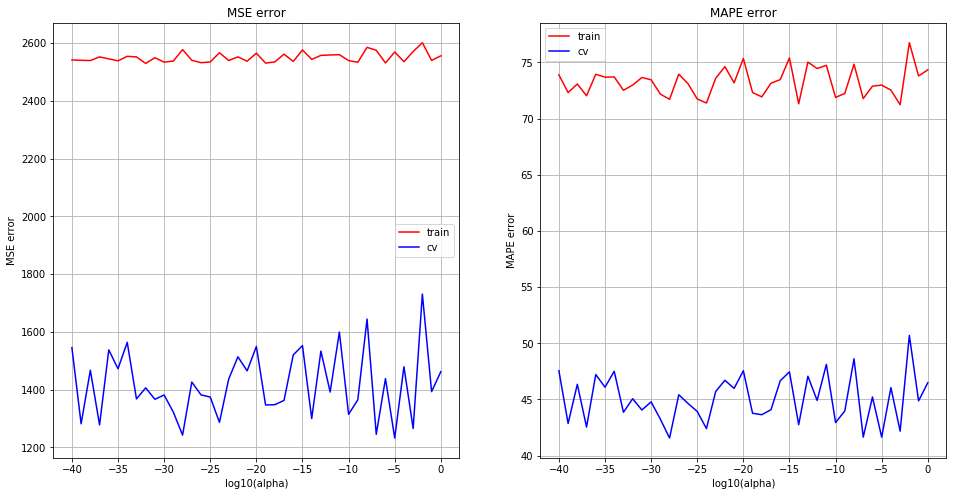

************************************************************************************************************************

test data mse for region 3 = 1261.7297874034716
test data mape for region 3 = 40.74675332793875



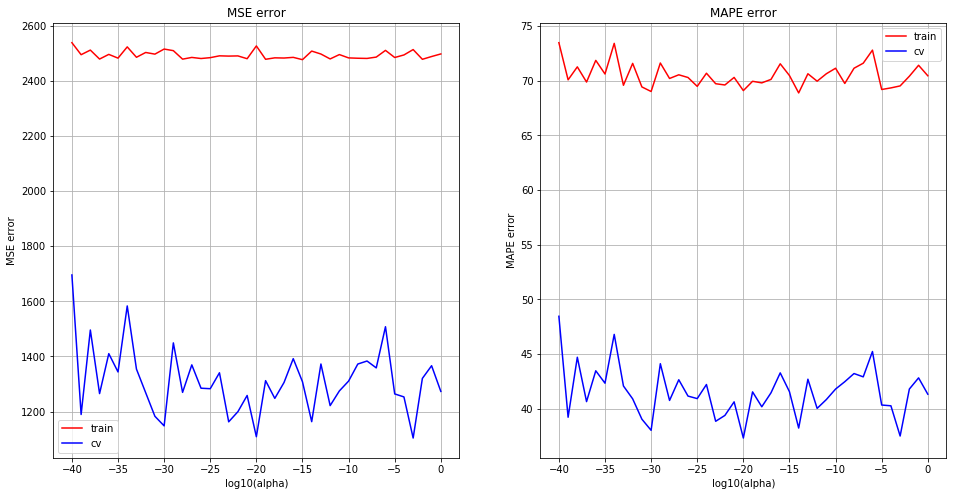

************************************************************************************************************************

test data mse for region 4 = 1379.5794119525965
test data mape for region 4 = 44.803013359754836



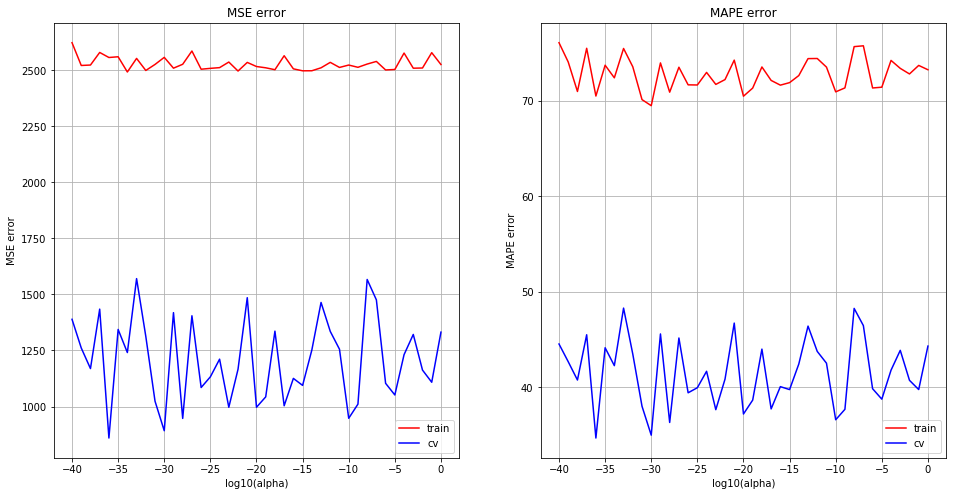

************************************************************************************************************************

test data mse for region 5 = 1505.8376165334842
test data mape for region 5 = 46.111432440453754



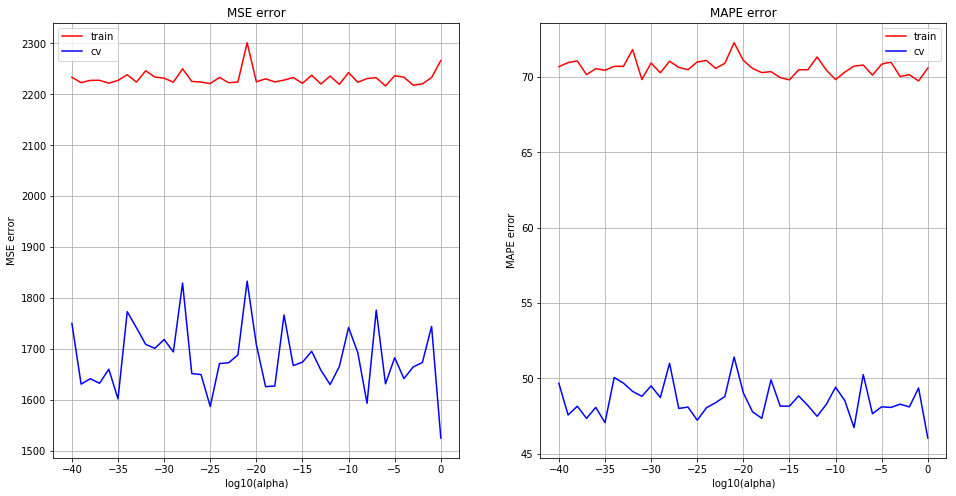

************************************************************************************************************************

test data mse for region 6 = 1422.7520833038425
test data mape for region 6 = 43.958217371507985



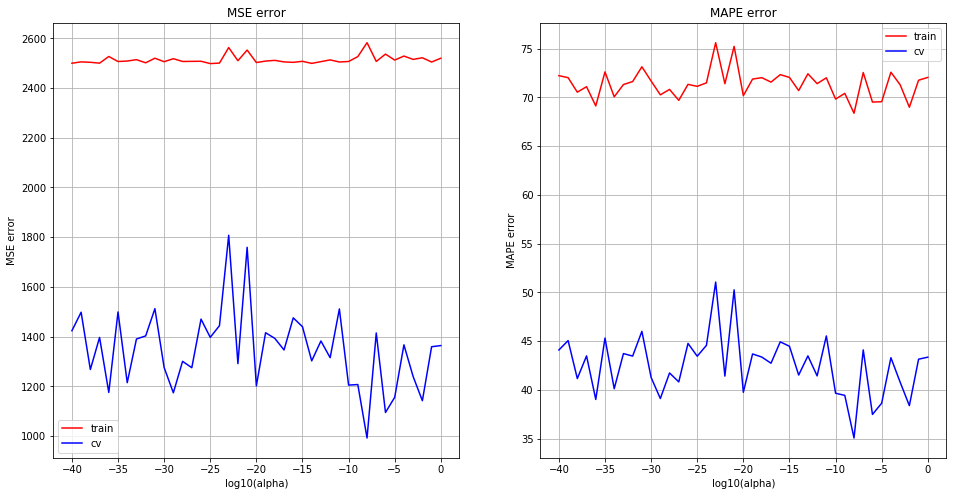

************************************************************************************************************************

test data mse for region 7 = 1090.7227383807985
test data mape for region 7 = 38.97851956223775



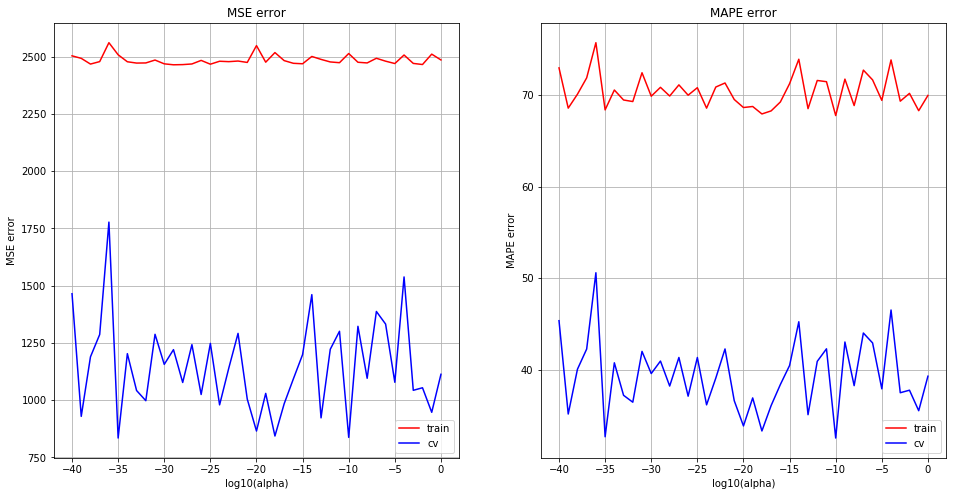

************************************************************************************************************************

test data mse for region 8 = 2109.532201290237
test data mape for region 8 = 56.59402944699131



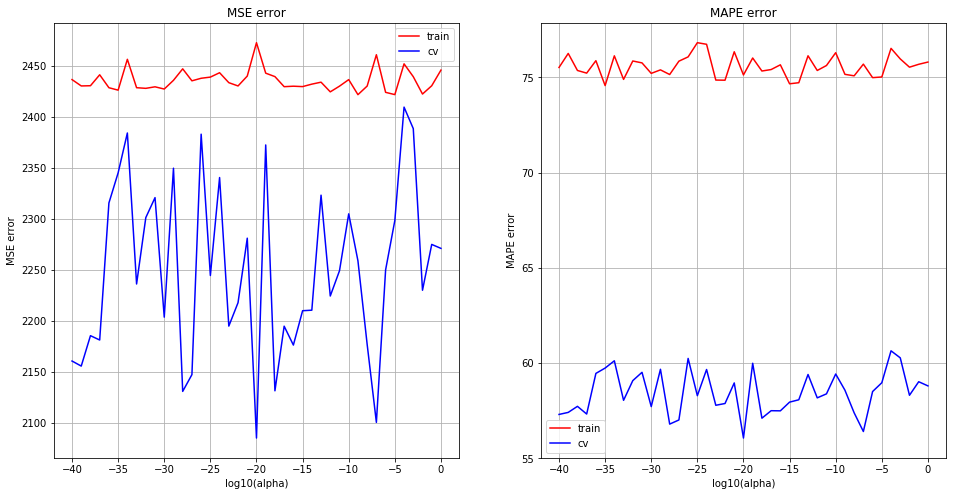

************************************************************************************************************************

test data mse for region 9 = 503.6237041204673
test data mape for region 9 = 25.0453986593213



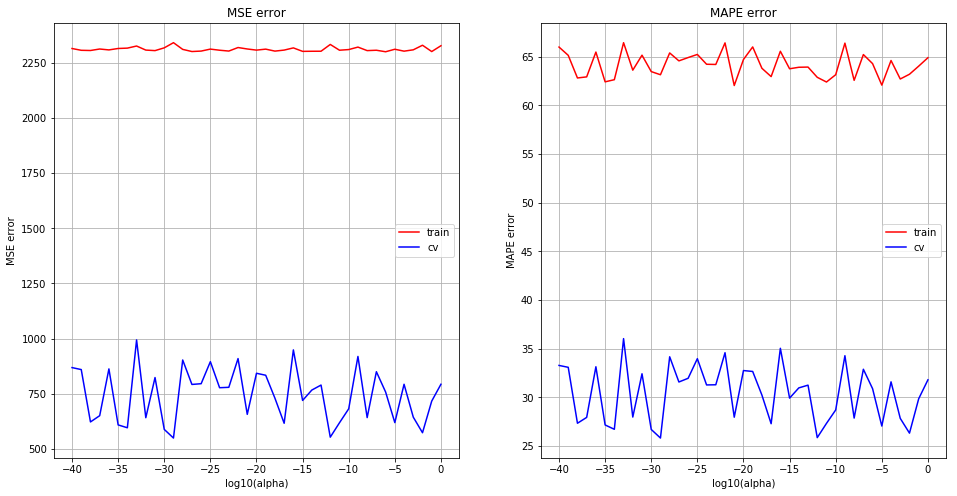

************************************************************************************************************************

test data mse for region 10 = 1463.5693678551083
test data mape for region 10 = 44.05049091176077



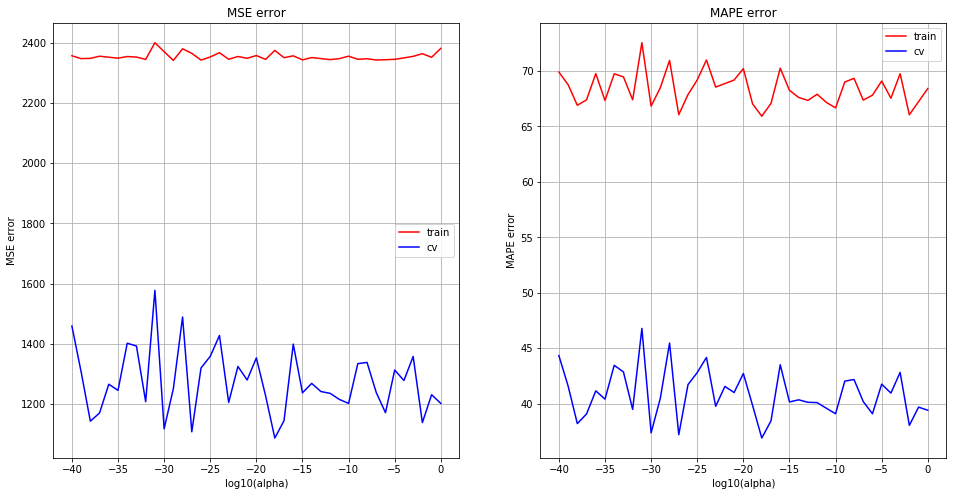

************************************************************************************************************************

test data mse for region 11 = 1788.2469252847027
test data mape for region 11 = 51.43513653080107



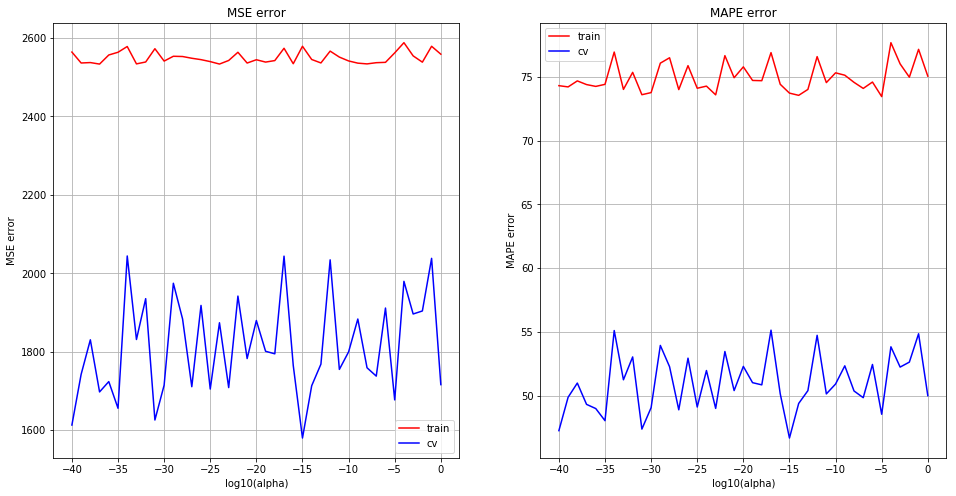

************************************************************************************************************************

test data mse for region 12 = 1224.8712970962629
test data mape for region 12 = 42.11742707948138



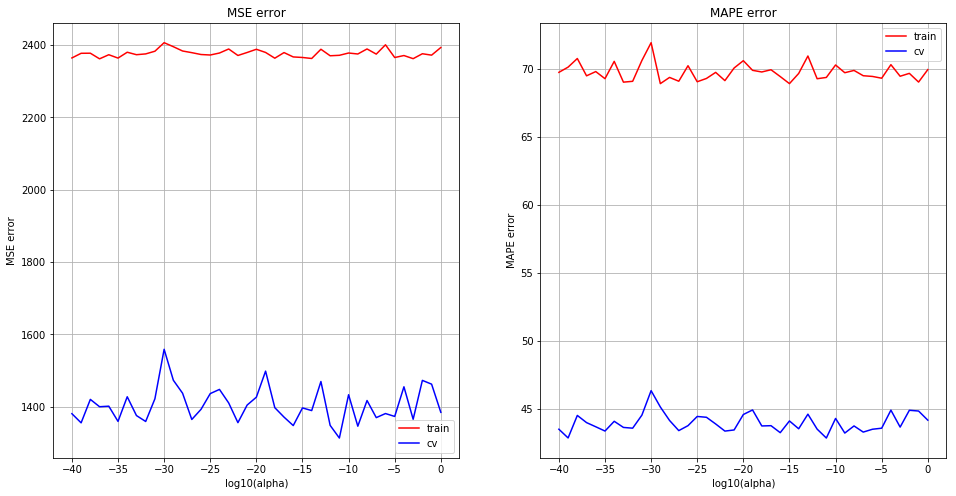

************************************************************************************************************************

test data mse for region 13 = 1677.5741579267628
test data mape for region 13 = 50.041084469943016



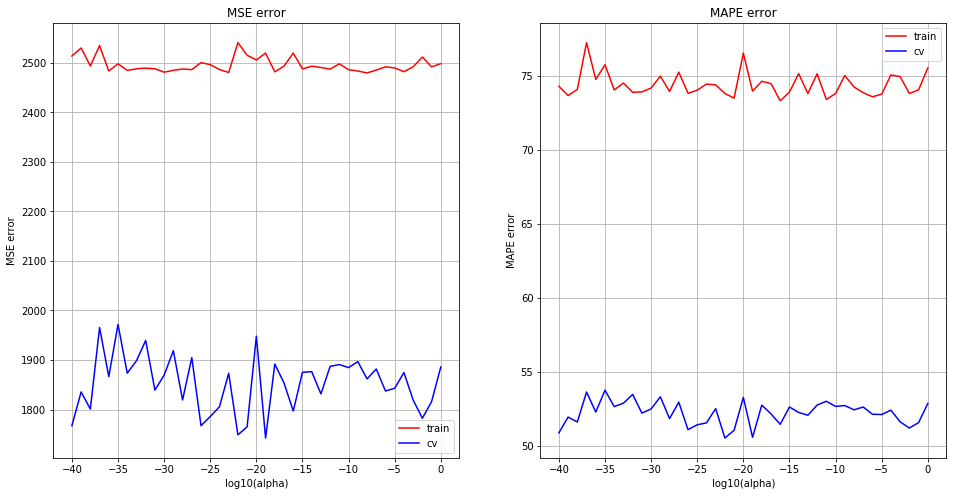

************************************************************************************************************************

test data mse for region 14 = 805.413428069527
test data mape for region 14 = 33.7887097911335



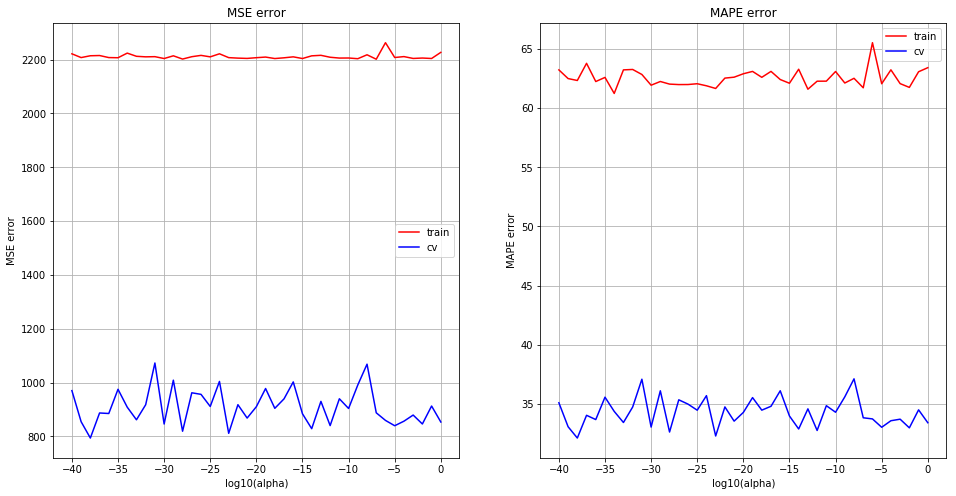

************************************************************************************************************************

test data mse for region 15 = 467.3337997642165
test data mape for region 15 = 24.16461943218816



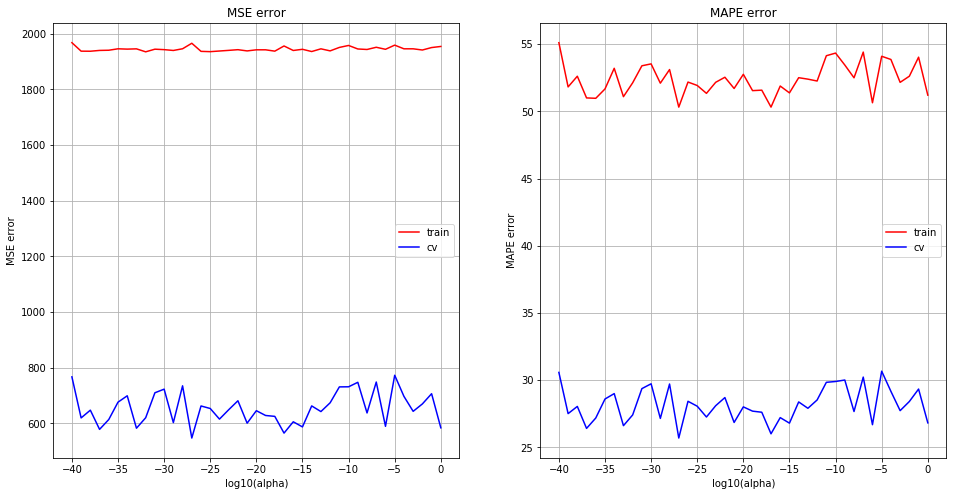

************************************************************************************************************************

test data mse for region 16 = 2070.989275680044
test data mape for region 16 = 56.14029540829959



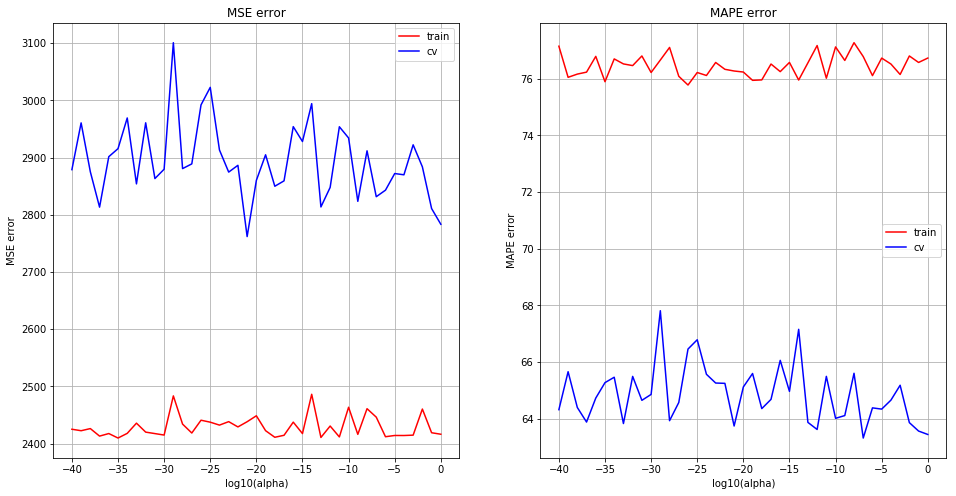

************************************************************************************************************************

test data mse for region 17 = 2066.587688279922
test data mape for region 17 = 55.68718934662986



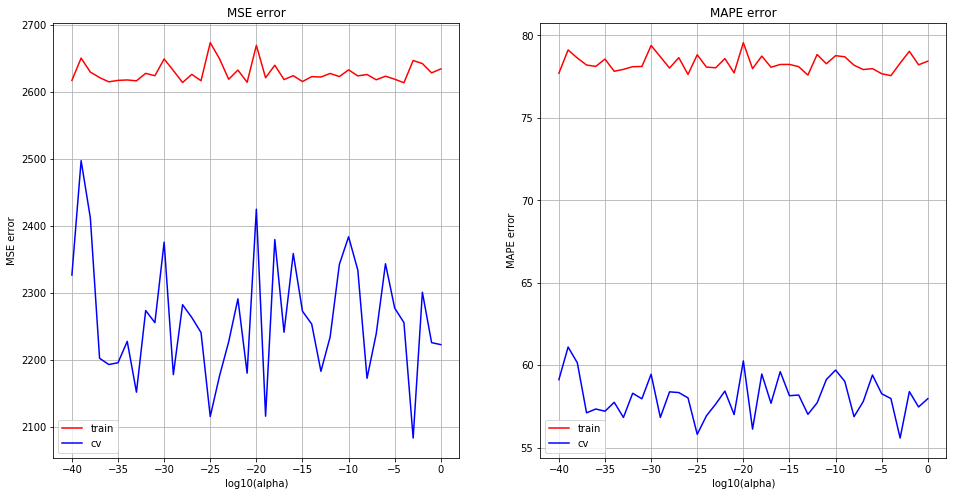

************************************************************************************************************************

test data mse for region 18 = 1523.9434337350272
test data mape for region 18 = 46.562365345258



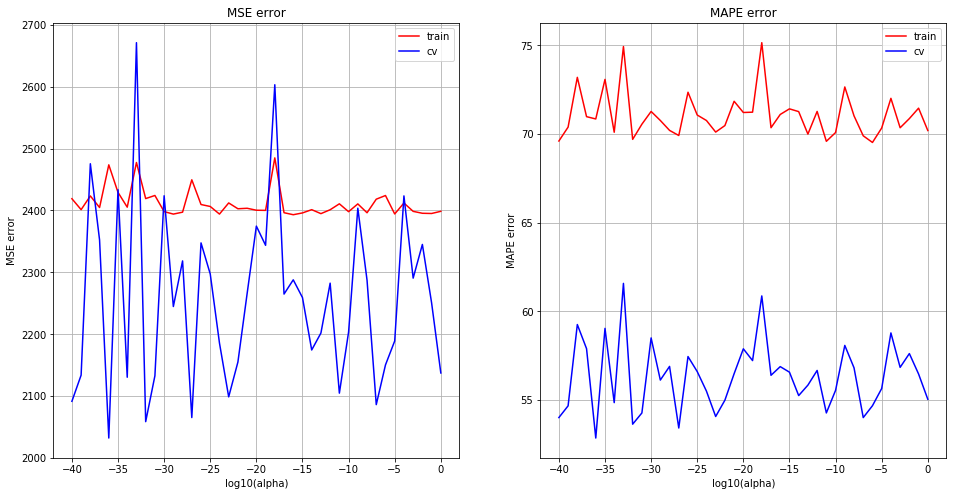

************************************************************************************************************************

test data mse for region 19 = 2056.989620415593
test data mape for region 19 = 55.58228372921167



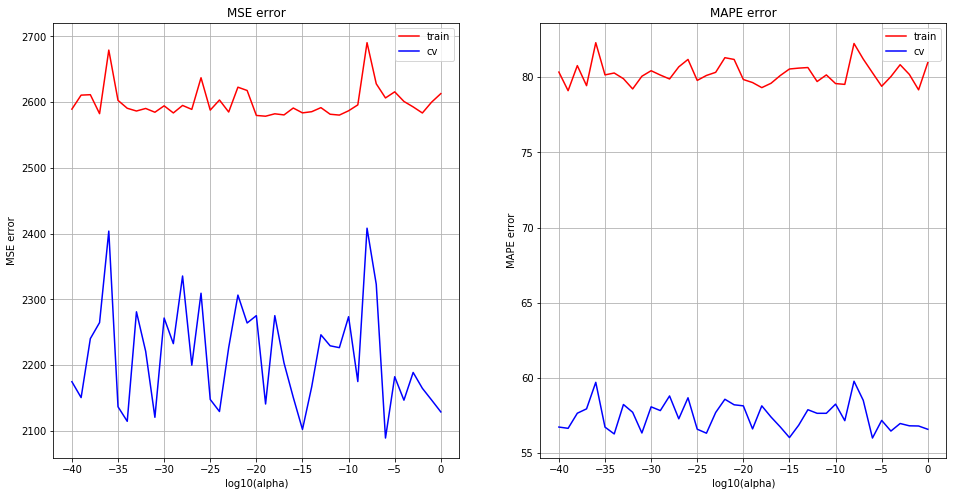

************************************************************************************************************************

test data mse for region 20 = 1092.5489338945508
test data mape for region 20 = 41.1759466578968



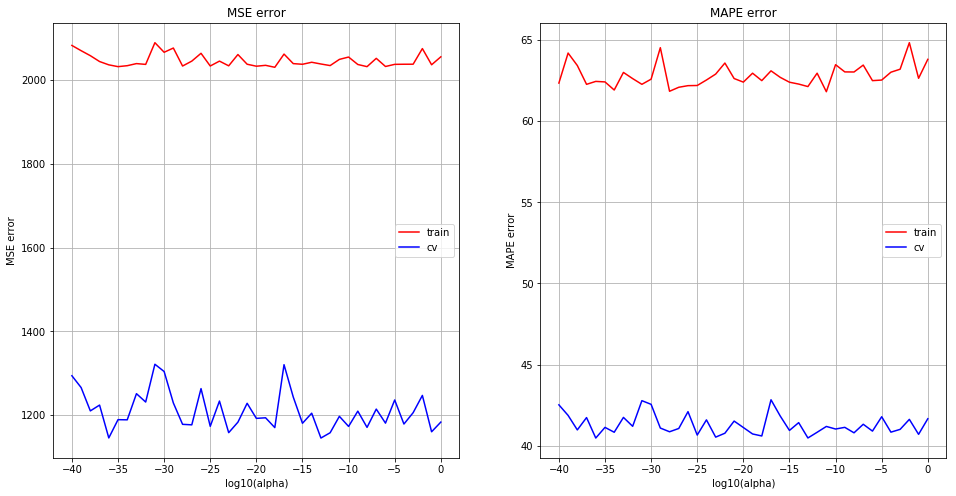

************************************************************************************************************************

test data mse for region 21 = 333.7051497147333
test data mape for region 21 = 20.632162517525533



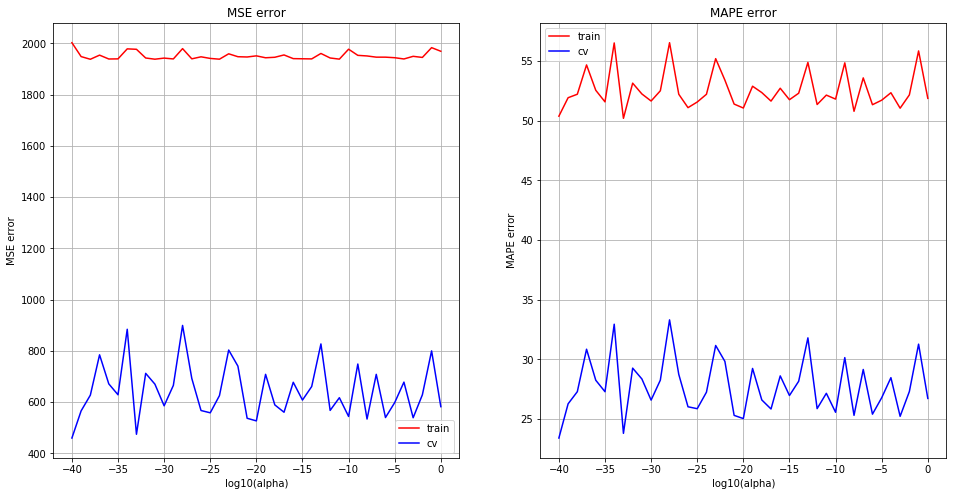

************************************************************************************************************************

test data mse for region 22 = 1520.9949146989757
test data mape for region 22 = 46.5722542321045



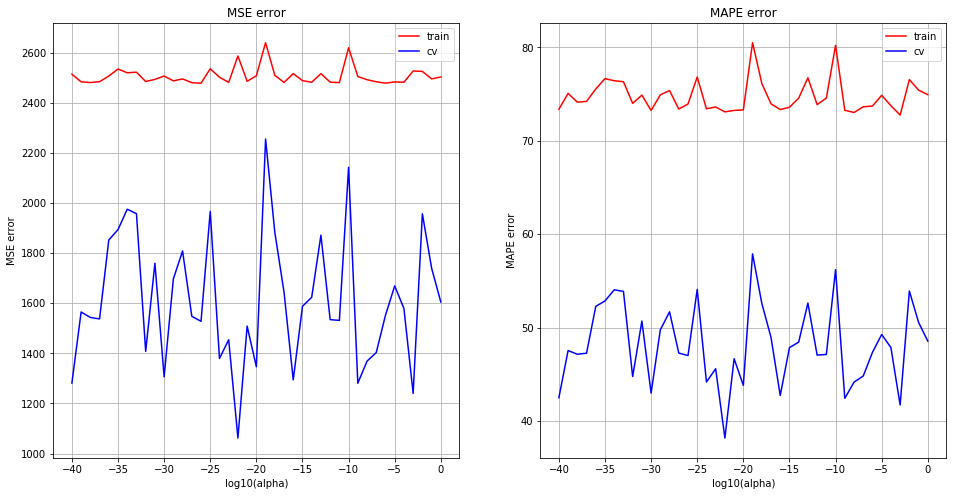

************************************************************************************************************************

test data mse for region 23 = 1754.312160587444
test data mape for region 23 = 51.06814186820054



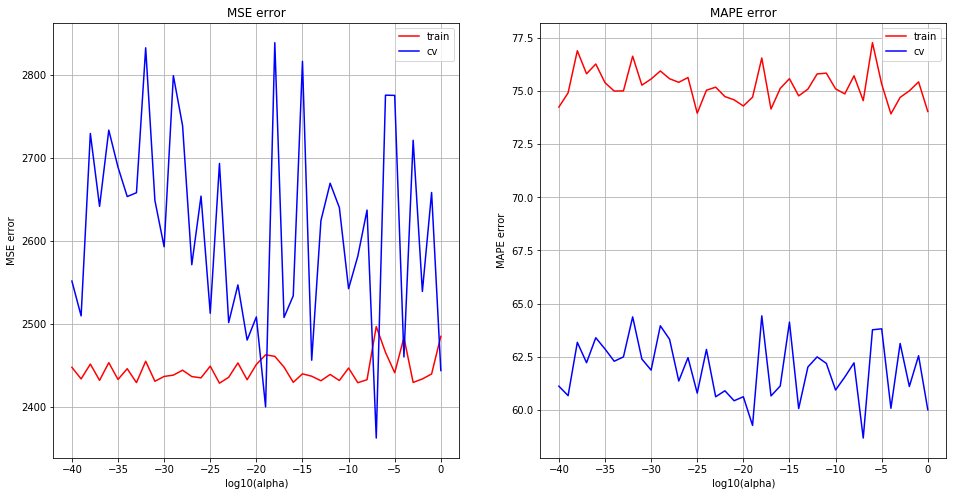

************************************************************************************************************************

test data mse for region 24 = 1349.3847593547675
test data mape for region 24 = 45.262408535360606



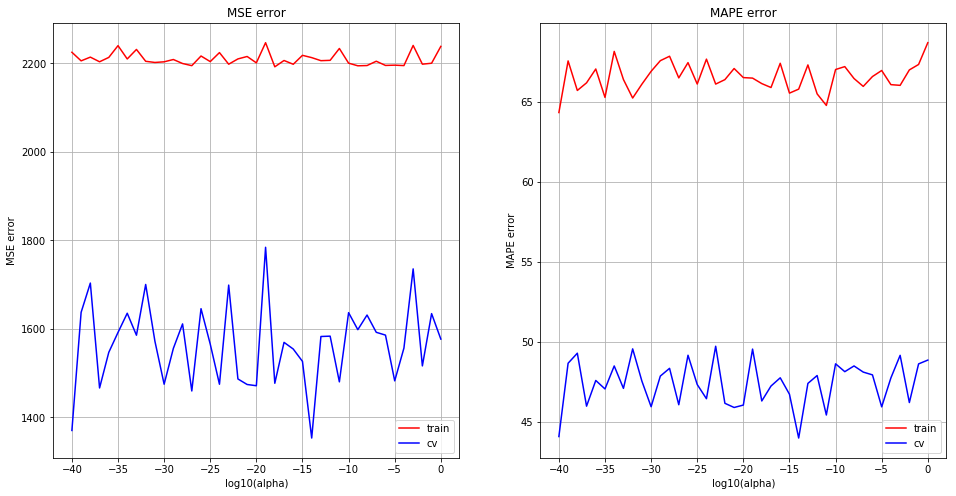

************************************************************************************************************************

test data mse for region 25 = 386.80861250852575
test data mape for region 25 = 21.68986472229245



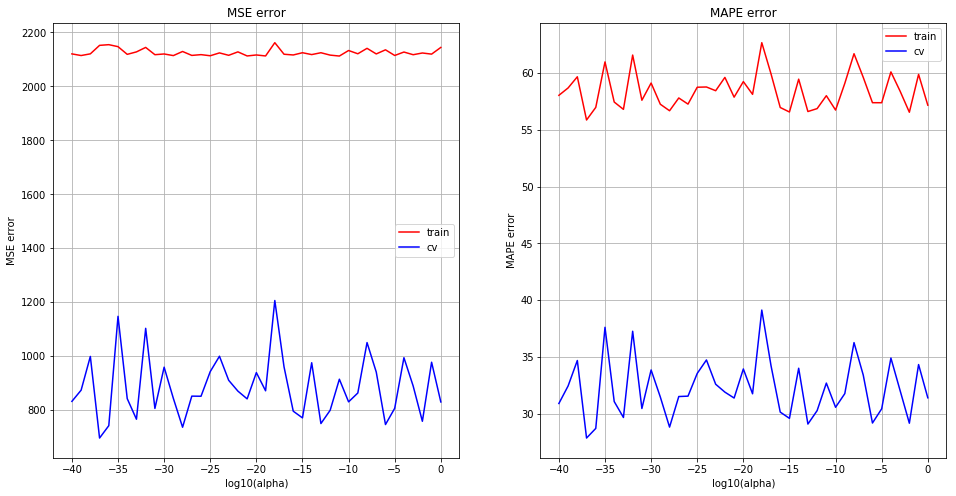

************************************************************************************************************************

test data mse for region 26 = 431.89931913904445
test data mape for region 26 = 22.927559575909704



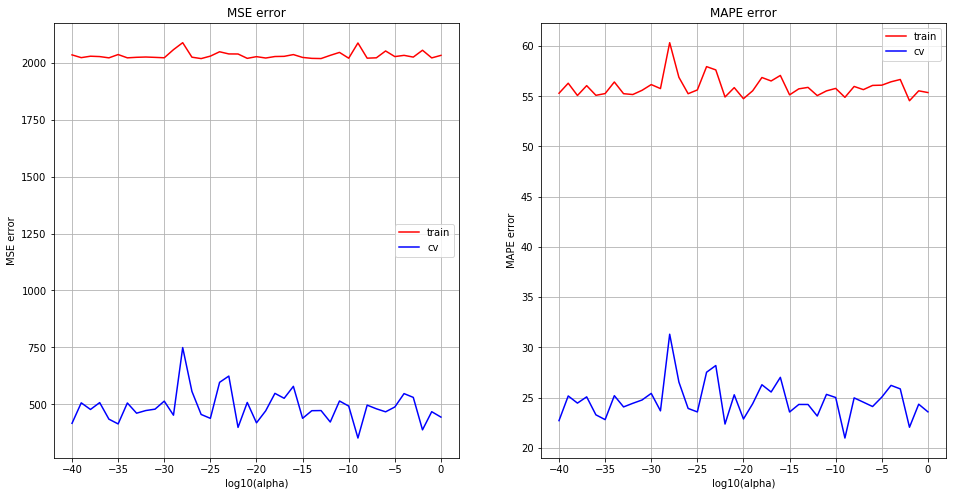

************************************************************************************************************************

test data mse for region 27 = 1618.9686222953167
test data mape for region 27 = 48.5448389871626



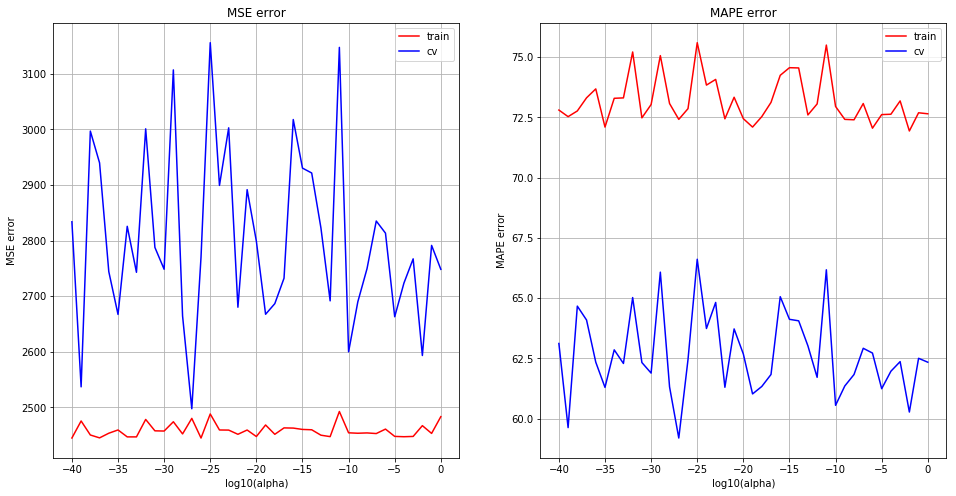

************************************************************************************************************************

test data mse for region 28 = 1876.6862664916491
test data mape for region 28 = 52.26875877064769



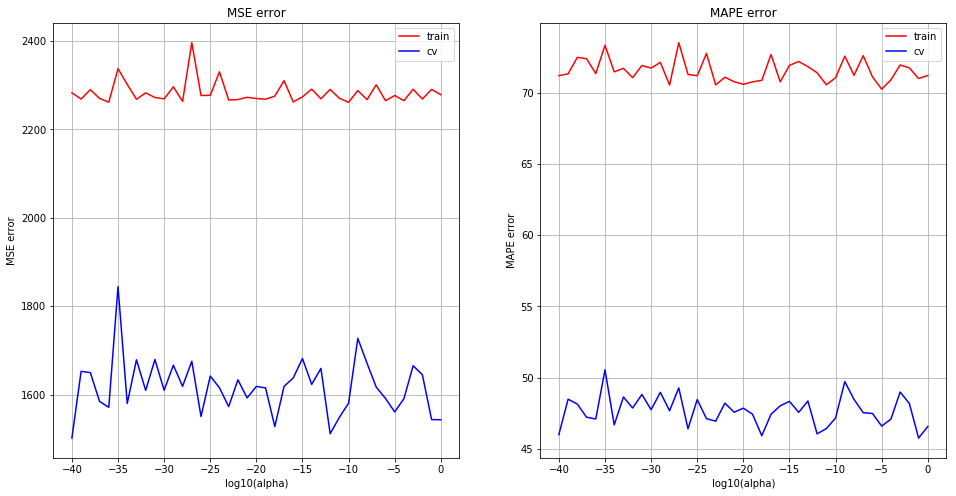

************************************************************************************************************************

test data mse for region 29 = 671.9756812420037
test data mape for region 29 = 29.245395635593265



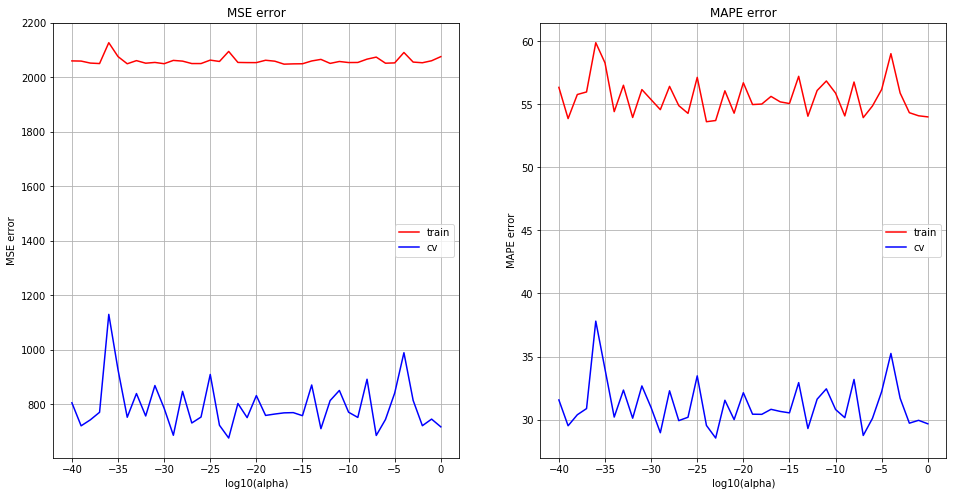

************************************************************************************************************************

test data mse for region 30 = 1722.0612191659463
test data mape for region 30 = 50.61632264293117



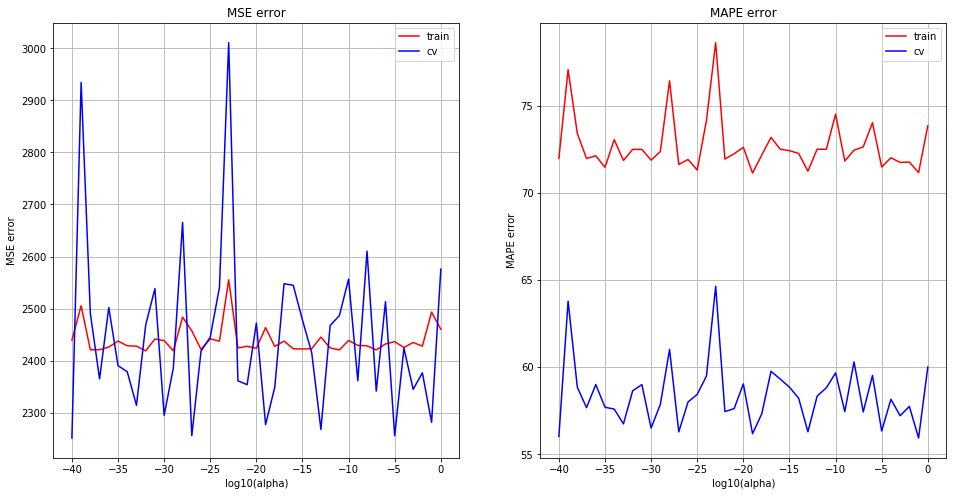

************************************************************************************************************************

test data mse for region 31 = 1345.6571368880086
test data mape for region 31 = 44.0066388070114



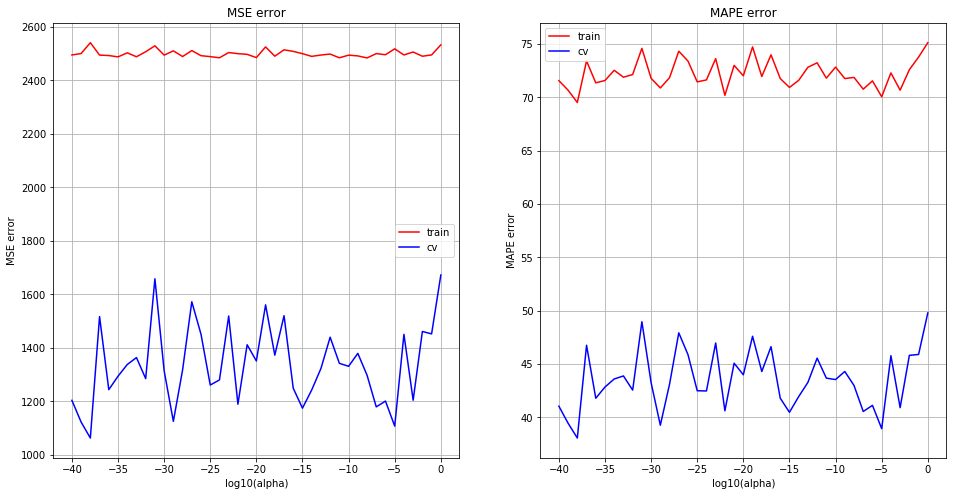

************************************************************************************************************************

test data mse for region 32 = 672.2359728168943
test data mape for region 32 = 28.6800092982724



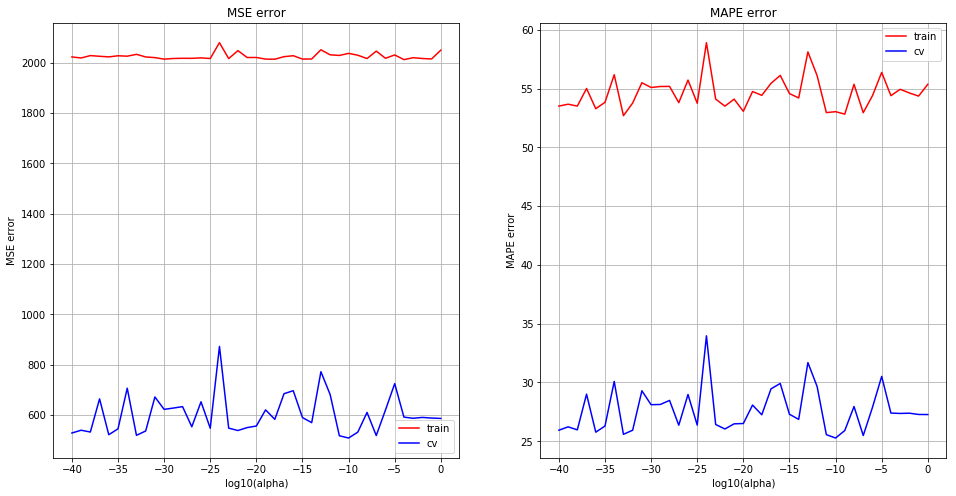

************************************************************************************************************************

test data mse for region 33 = 1562.6843456945705
test data mape for region 33 = 47.98697577810812



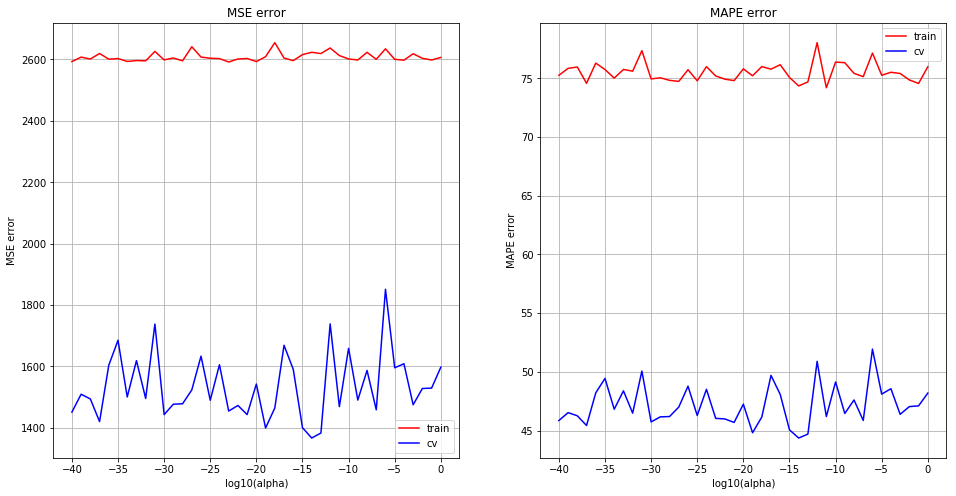

************************************************************************************************************************

test data mse for region 34 = 887.1951618344336
test data mape for region 34 = 34.12667282607226



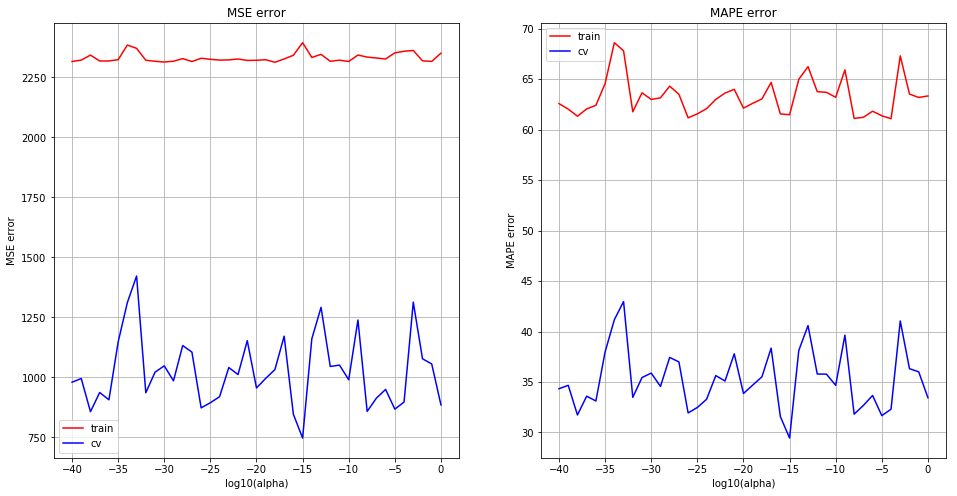

************************************************************************************************************************

test data mse for region 35 = 1381.9201298556025
test data mape for region 35 = 43.550433143450434



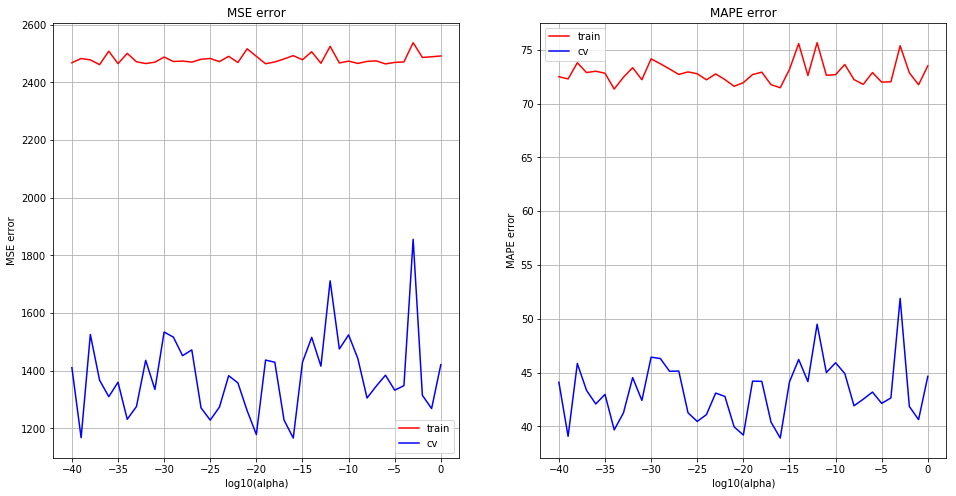

************************************************************************************************************************

test data mse for region 36 = 1704.9164199365243
test data mape for region 36 = 49.450063405304306



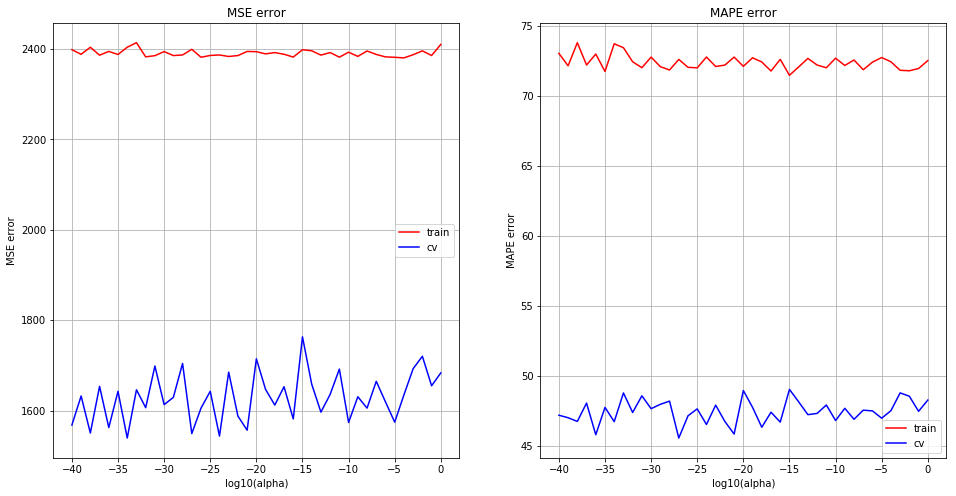

************************************************************************************************************************

test data mse for region 37 = 1747.0807367051825
test data mape for region 37 = 50.88142542769582



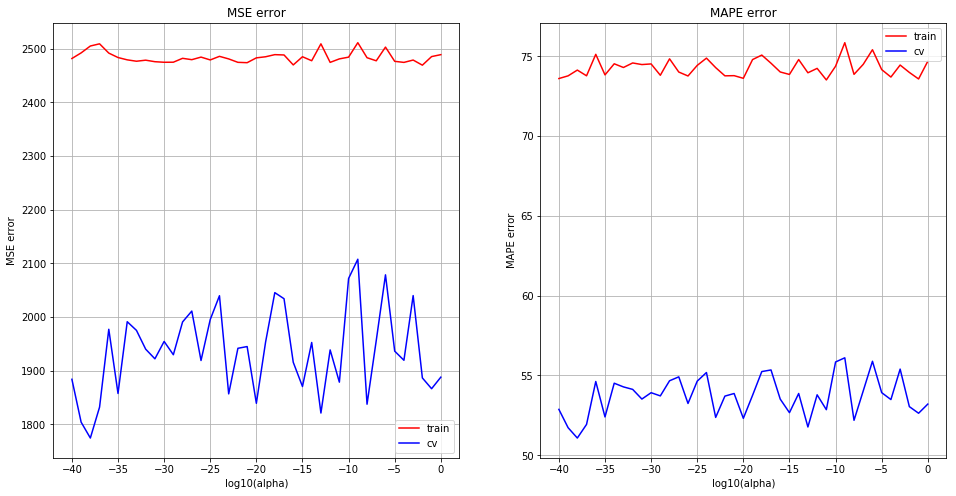

************************************************************************************************************************

test data mse for region 38 = 1696.8288742966847
test data mape for region 38 = 50.36456721903974



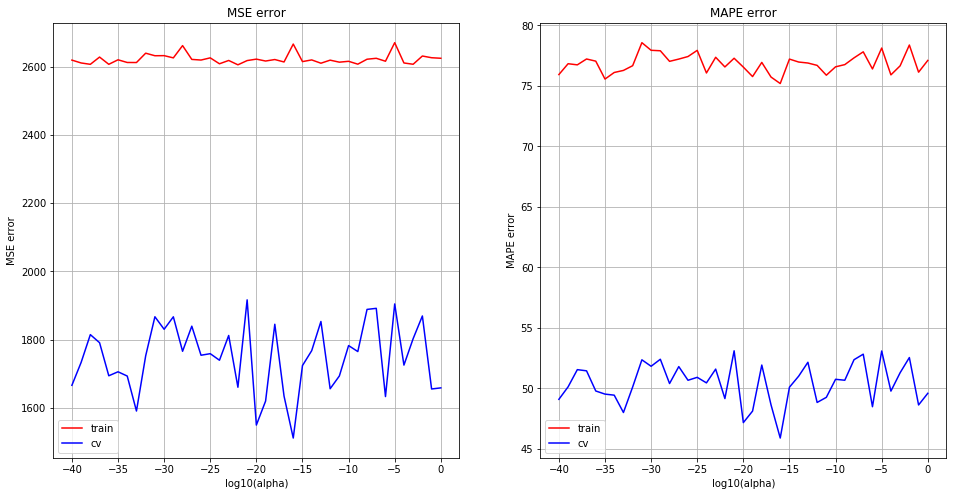

************************************************************************************************************************

test data mse for region 39 = 125.54734854252982
test data mape for region 39 = 12.079778228514765



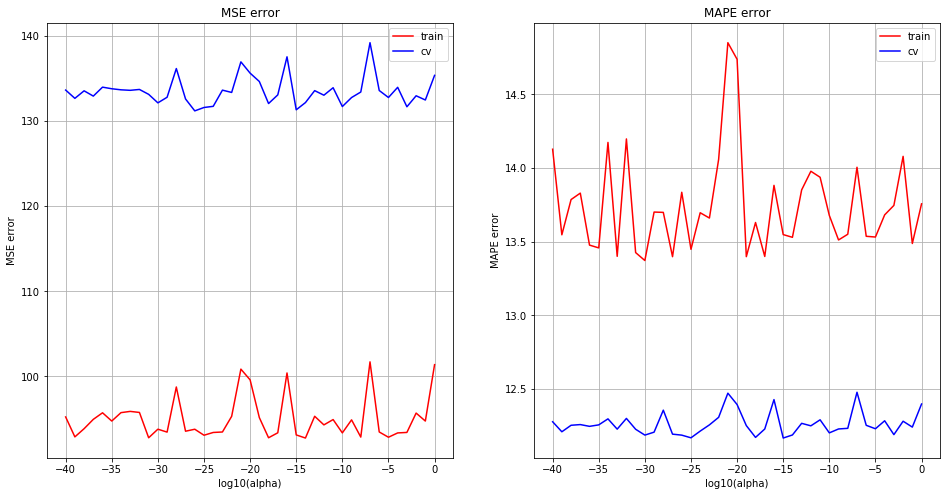

************************************************************************************************************************

average test error = 42.1704750720017


In [144]:
test_errors=[]
for r in range(40):
    scaler=StandardScaler()
    x_train_scaled=scaler.fit_transform(x_trains[r])
    x_cv_scaled=scaler.transform(x_cvs[r])
    x_test_scaled=scaler.transform(x_tests[r])
    
#     x_train_scaled=x_trains[r]
#     x_cv_scaled=x_cvs[r]
#     x_test_scaled=x_tests[r]
    
    alpha=[10**x for x in np.arange(-40, 1, 1, float)]
    log_alpha=[x for x in np.arange(-40, 1, 1, float)]
    
    train_err_mse=[]
    cv_err_mse=[]
    
    train_err_mape=[]
    cv_err_mape=[]
    
    for a in alpha:
        model=SGDRegressor(alpha=a, penalty='l1')
        model.fit(x_train_scaled, y_train)
        
        predictions_train=model.predict(x_train_scaled)
        predictions_cv=model.predict(x_cv_scaled)
        
        train_err_mse.append(get_mse(predictions_train, y_train.values))
        cv_err_mse.append(get_mse(predictions_cv, y_cv.values))
        
        train_err_mape.append(get_mape(predictions_train, y_train.values))
        cv_err_mape.append(get_mape(predictions_cv, y_cv.values))
        
#         print(f'train mape for region {r} with alpha = {a} : {train_err_mape[-1]}')
#         print(f'cv mape for region {r} with alpha = {a} : {cv_err_mape[-1]}\n')
        
#         print(f'train mape for region {r} with alpha = {a} : {train_err_mape[-1]}')
#         print(f'cv mape for region {r} with alpha = {a} : {cv_err_mape[-1]}\n')
    
    fig, (ax1, ax2)=plt.subplots(nrows=1, ncols=2)
    
    ax1.set_title('MSE error')
    ax1.plot(log_alpha, train_err_mse, 'r', label='train')
    ax1.plot(log_alpha, cv_err_mse, 'b', label='cv')
    ax1.set_xlabel('log10(alpha)')
    ax1.set_ylabel('MSE error')
    ax1.legend()
    ax1.grid()
    
    ax2.set_title('MAPE error')
    ax2.plot(log_alpha, train_err_mape, 'r', label='train')
    ax2.plot(log_alpha, cv_err_mape, 'b', label='cv')
    ax2.set_xlabel('log10(alpha)')
    ax2.set_ylabel('MAPE error')
    ax2.legend()
    ax2.grid()
    
    best_alpha=alpha[np.argmin(cv_err_mape)]
    best_model=SGDRegressor(alpha=best_alpha, penalty='l1')
    model.fit(x_train_scaled, y_train)
    
    
    predictions_test=model.predict(x_test_scaled)
    test_mape=get_mape(predictions_test, y_test.values)
    test_errors.append(test_mape)
    print(f'test data mse for region {r} = {get_mse(predictions_test, y_test.values)}')
    print(f'test data mape for region {r} = {test_mape}\n')
    plt.show()
    print('*'*120+'\n')

print(f'average test error = {np.mean(test_errors)}')

## Random forest regressor

In [145]:
from sklearn.ensemble import RandomForestRegressor

test data mse for region 0 = 289.9136430502521
test data mape for region 0 = 12.849141980281237



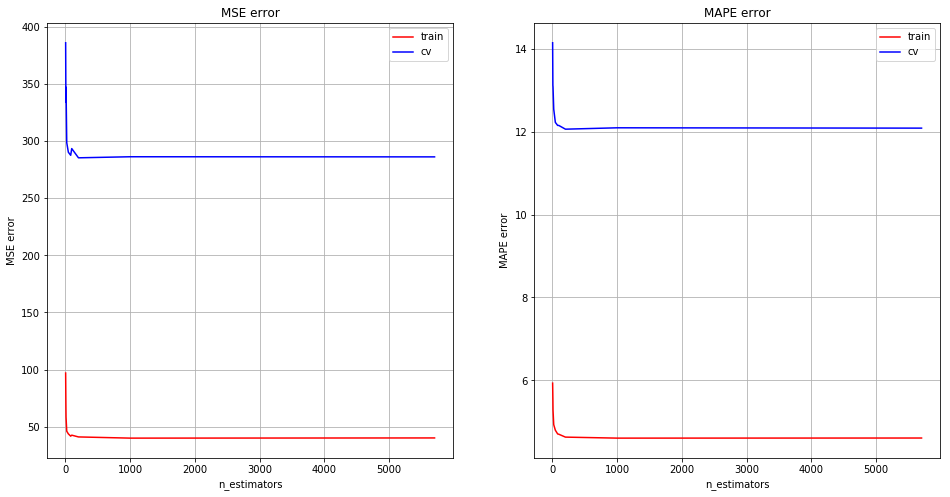

************************************************************************************************************************

test data mse for region 1 = 1.6000579516914404
test data mape for region 1 = 77.87594917022557



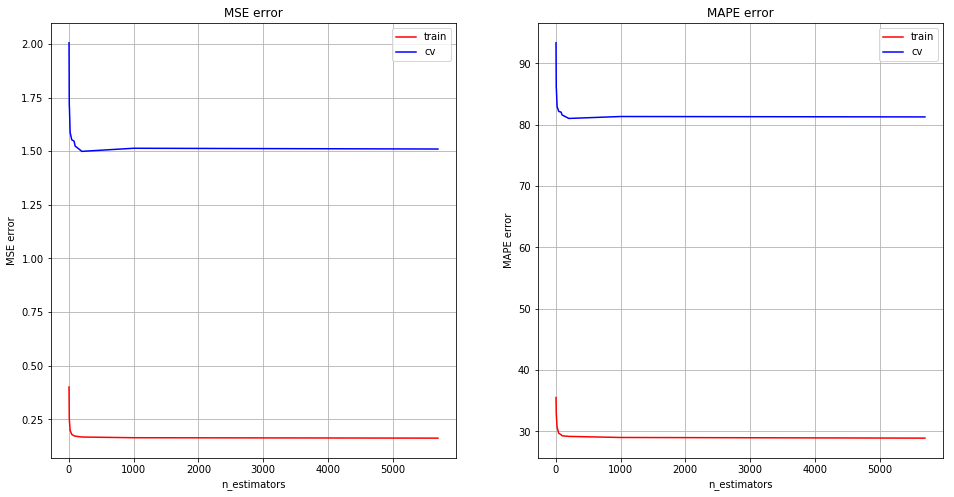

************************************************************************************************************************

test data mse for region 2 = 134.93720144036226
test data mape for region 2 = 10.46778577487502



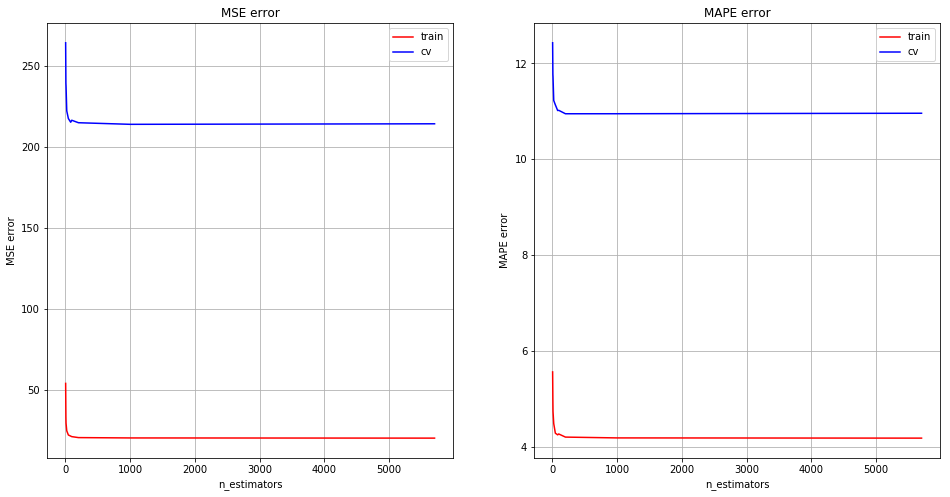

************************************************************************************************************************

test data mse for region 3 = 332.7442534420532
test data mape for region 3 = 18.803648519354002



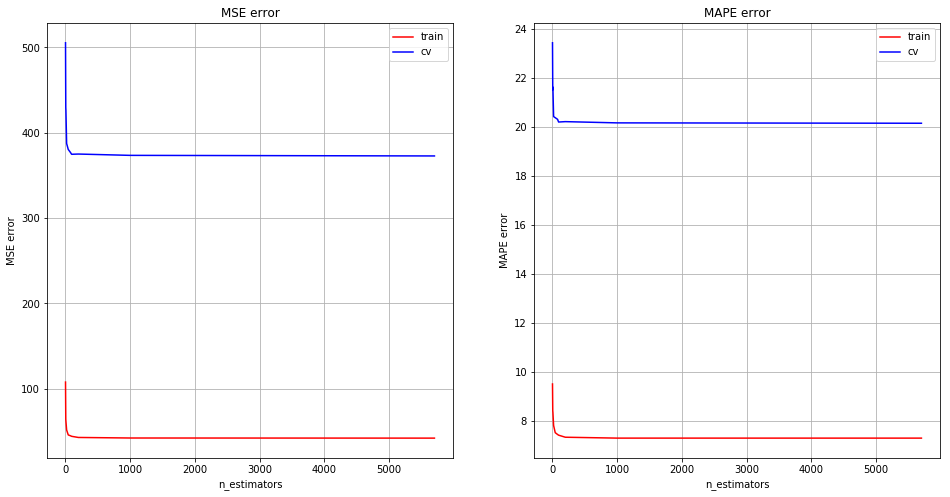

************************************************************************************************************************

test data mse for region 4 = 192.32641497061863
test data mape for region 4 = 9.300458700689699



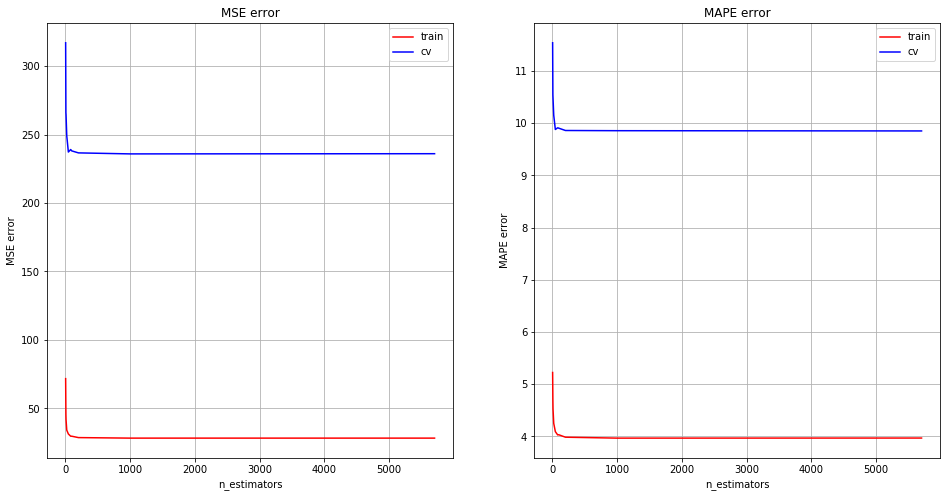

************************************************************************************************************************

test data mse for region 5 = 149.47211396229343
test data mape for region 5 = 16.779683167356605



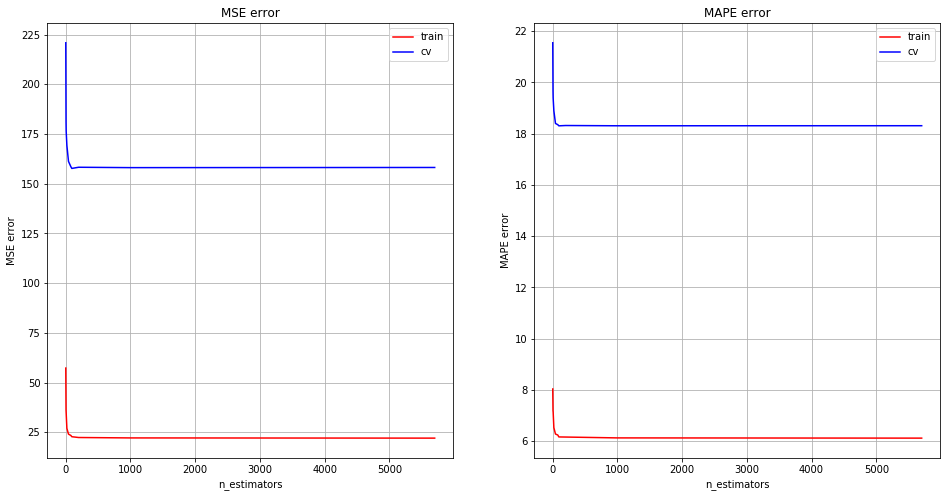

************************************************************************************************************************

test data mse for region 6 = 123.90767445640647
test data mape for region 6 = 10.455467417310839



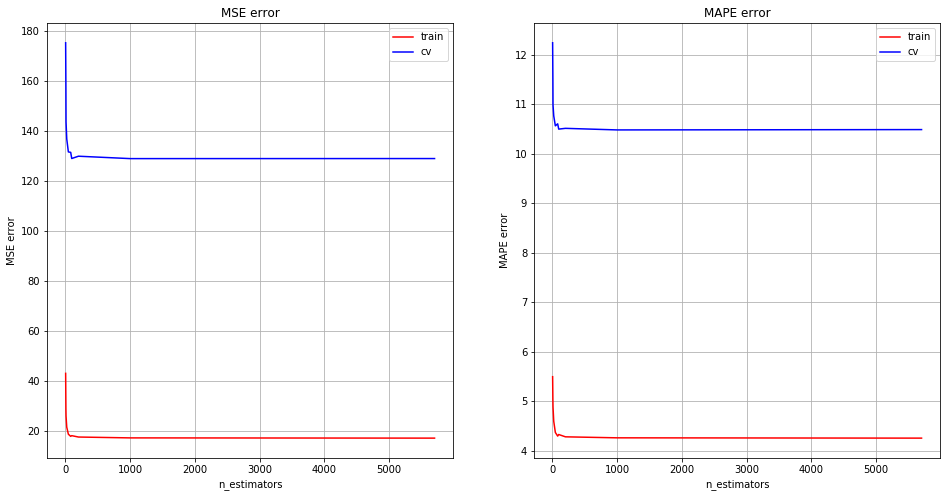

************************************************************************************************************************

test data mse for region 7 = 289.4271649089707
test data mape for region 7 = 8.358396507933909



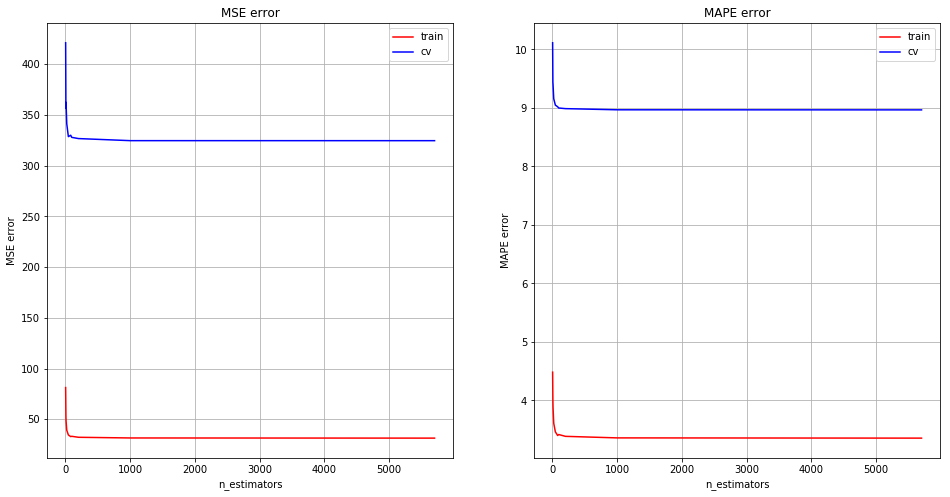

************************************************************************************************************************

test data mse for region 8 = 25.42750738983338
test data mape for region 8 = 24.63634132127752



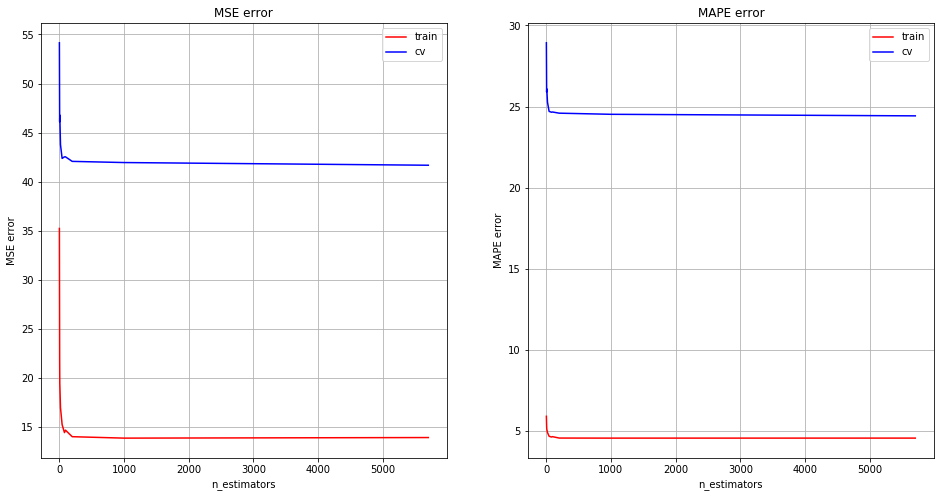

************************************************************************************************************************

test data mse for region 9 = 133.74226794502113
test data mape for region 9 = 10.77817633124475



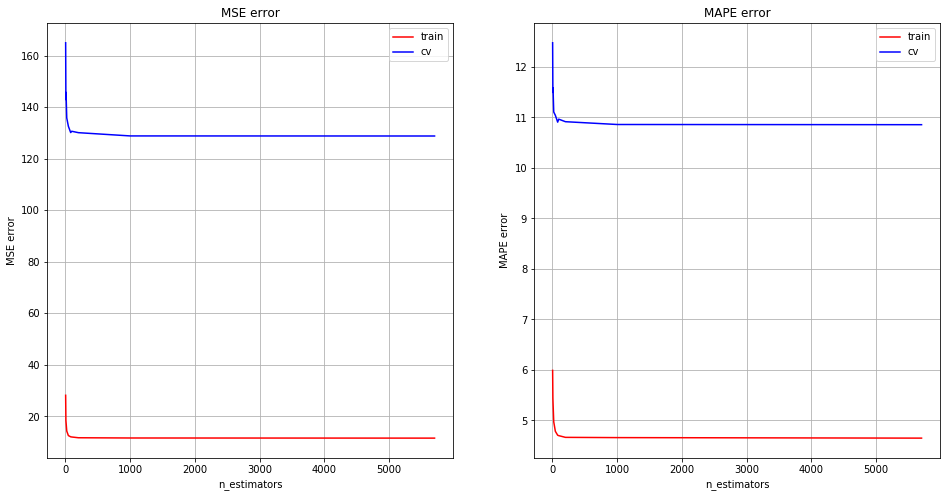

************************************************************************************************************************

test data mse for region 10 = 122.91310996813353
test data mape for region 10 = 11.934424975903525



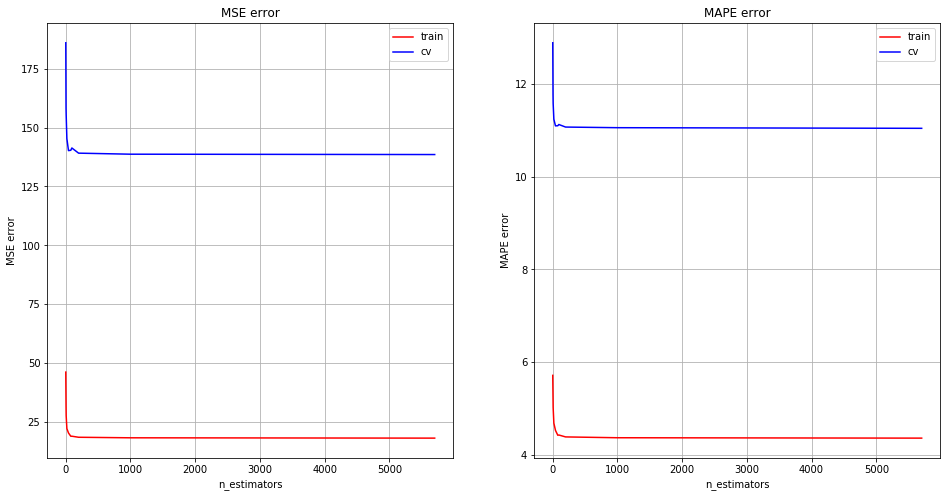

************************************************************************************************************************

test data mse for region 11 = 93.30427787738334
test data mape for region 11 = 13.157687128356105



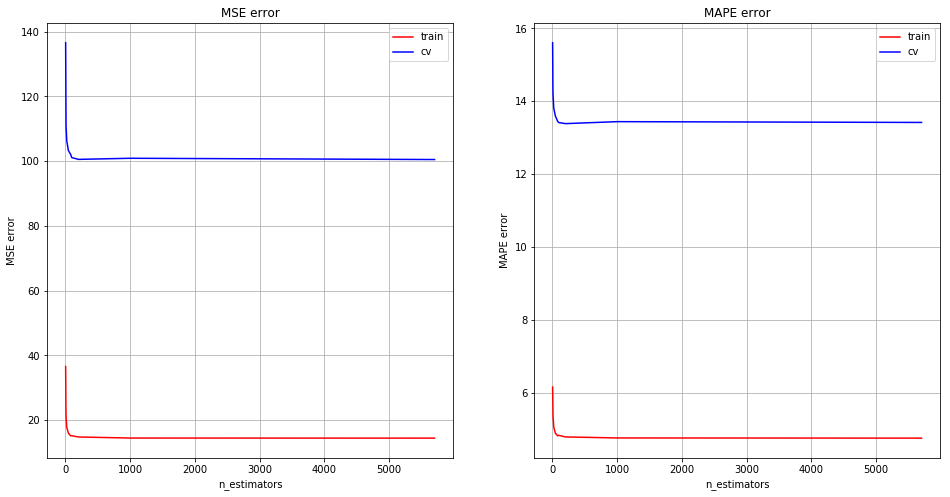

************************************************************************************************************************

test data mse for region 12 = 166.00660332455126
test data mape for region 12 = 11.788397584904688



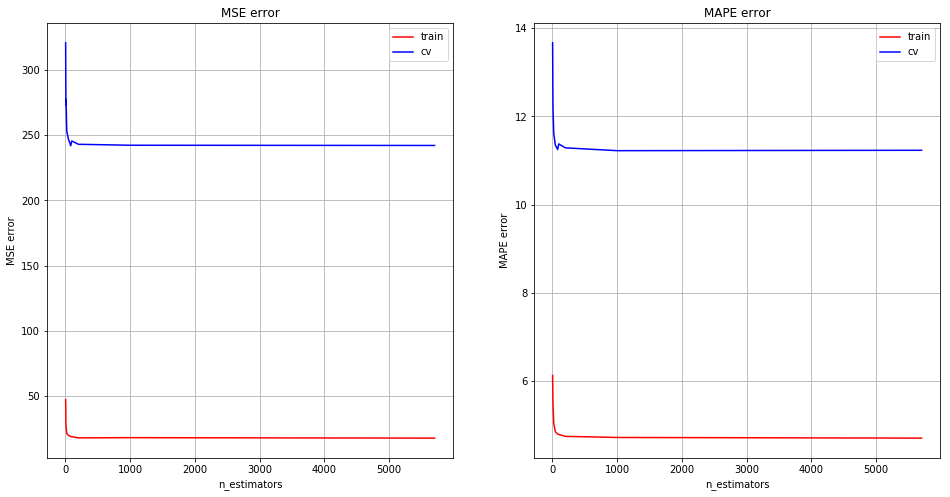

************************************************************************************************************************

test data mse for region 13 = 31.61331825456482
test data mape for region 13 = 22.05075378110446



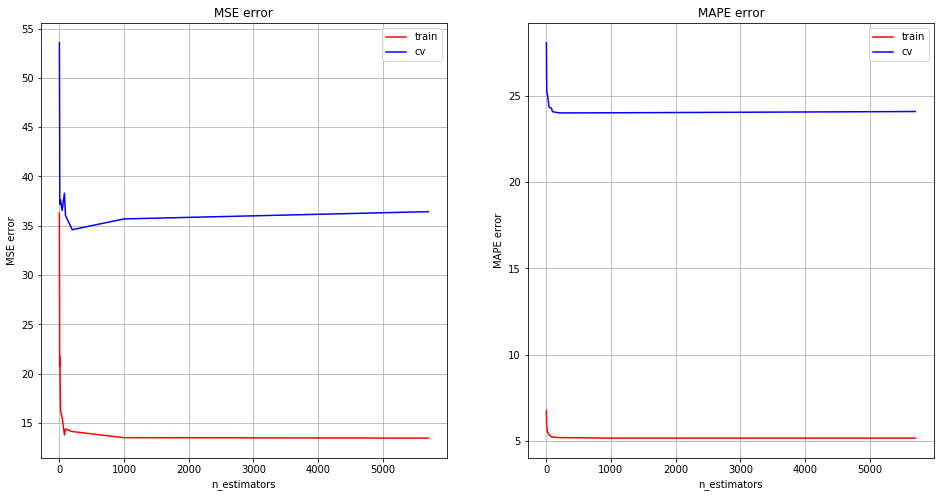

************************************************************************************************************************

test data mse for region 14 = 56.196815640131184
test data mape for region 14 = 17.72562037772611



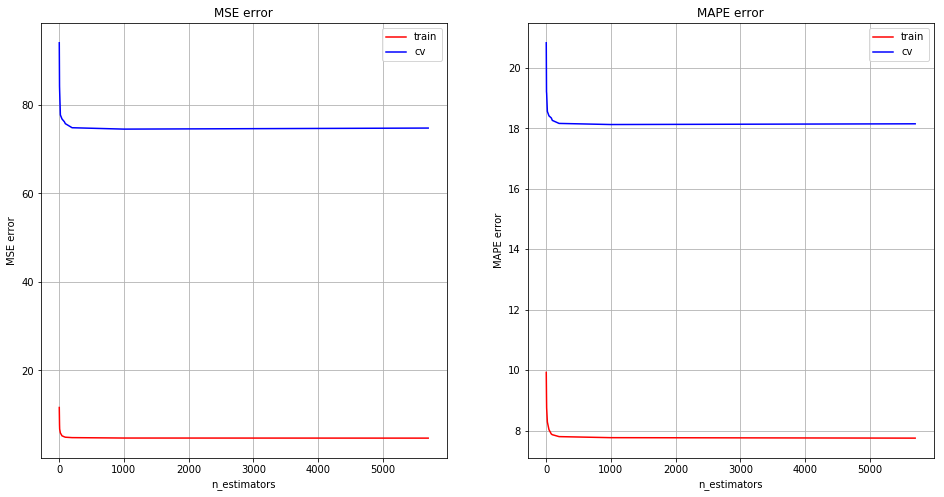

************************************************************************************************************************

test data mse for region 15 = 267.5354289840161
test data mape for region 15 = 9.319831323925353



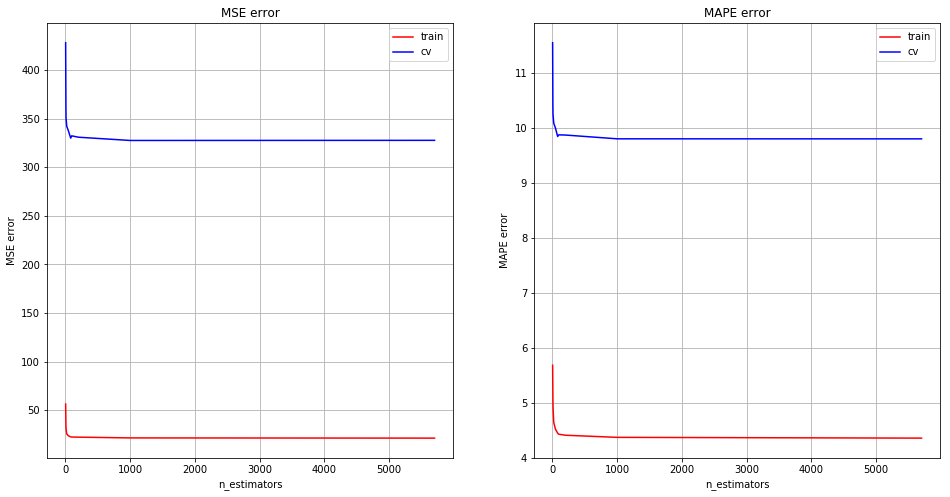

************************************************************************************************************************

test data mse for region 16 = 114.8799134125997
test data mape for region 16 = 12.580154163627094



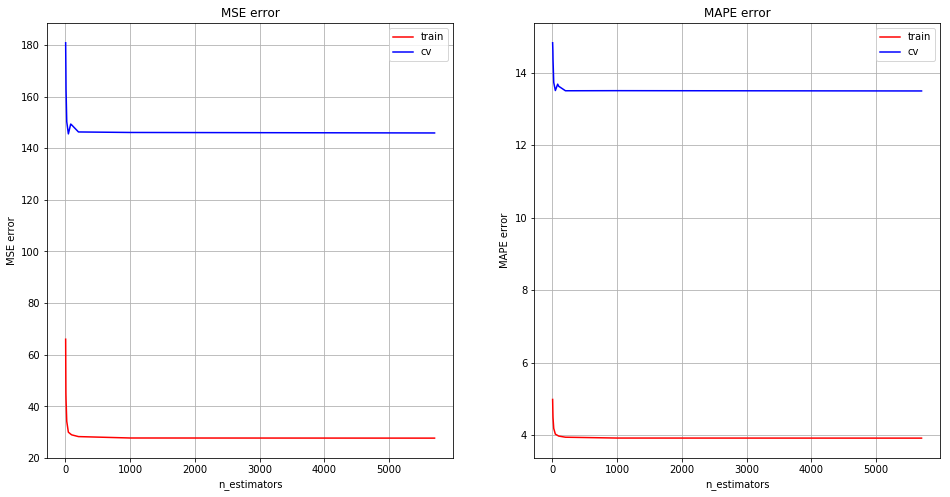

************************************************************************************************************************

test data mse for region 17 = 60.720047944717706
test data mape for region 17 = 15.108279463117118



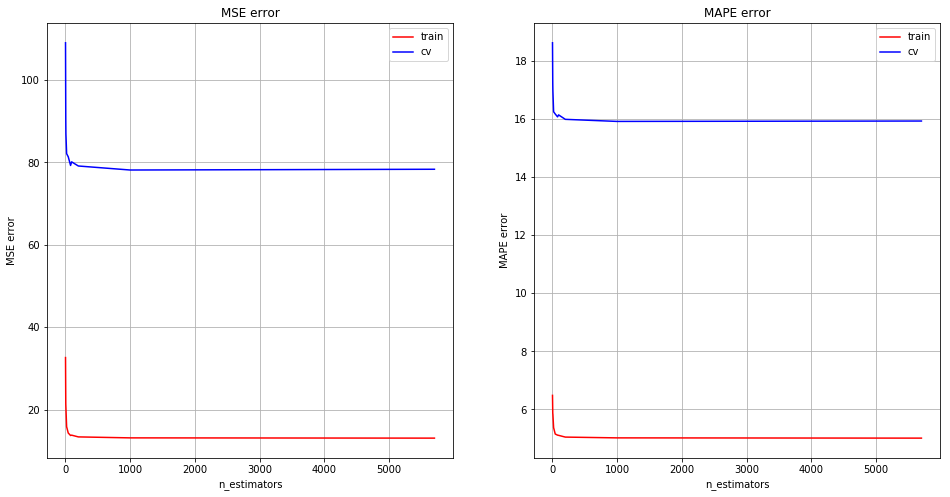

************************************************************************************************************************

test data mse for region 18 = 5.177203664466955
test data mape for region 18 = 44.40862618771813



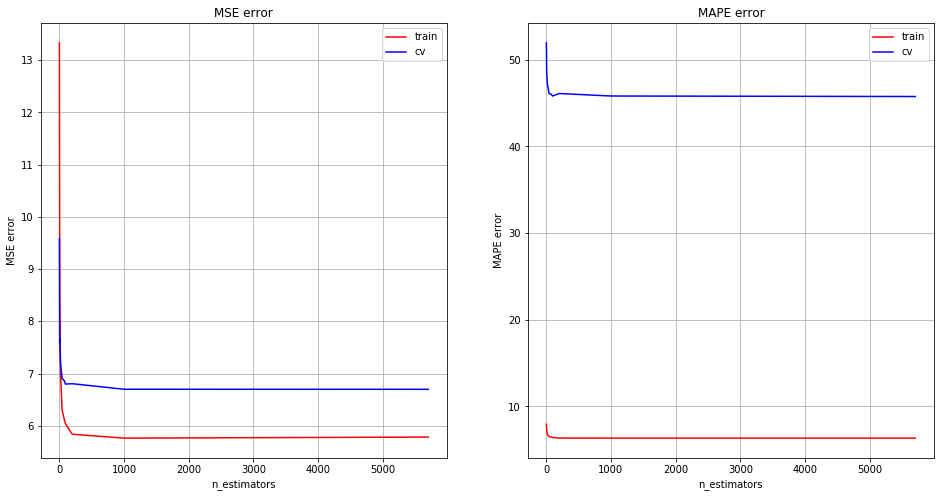

************************************************************************************************************************

test data mse for region 19 = 1.7835412224189189
test data mape for region 19 = 69.17018478790031



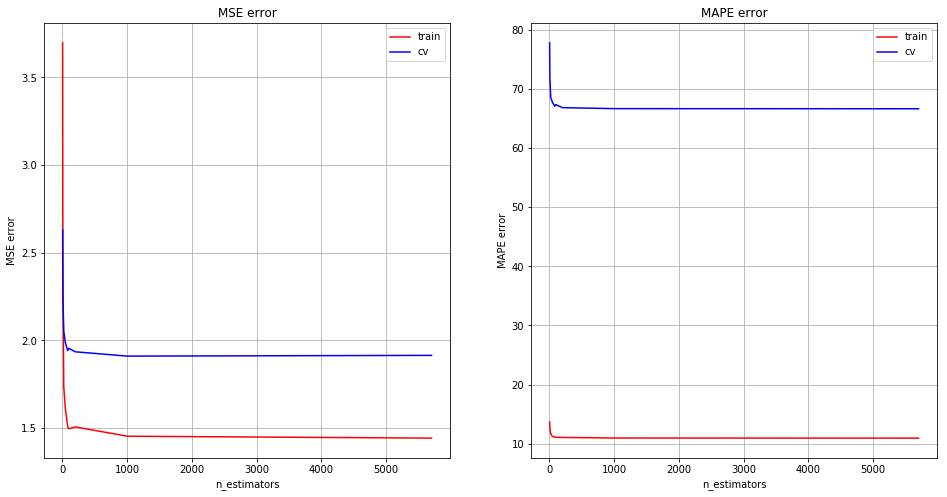

************************************************************************************************************************

test data mse for region 20 = 43.18020550819632
test data mape for region 20 = 22.763893810568668



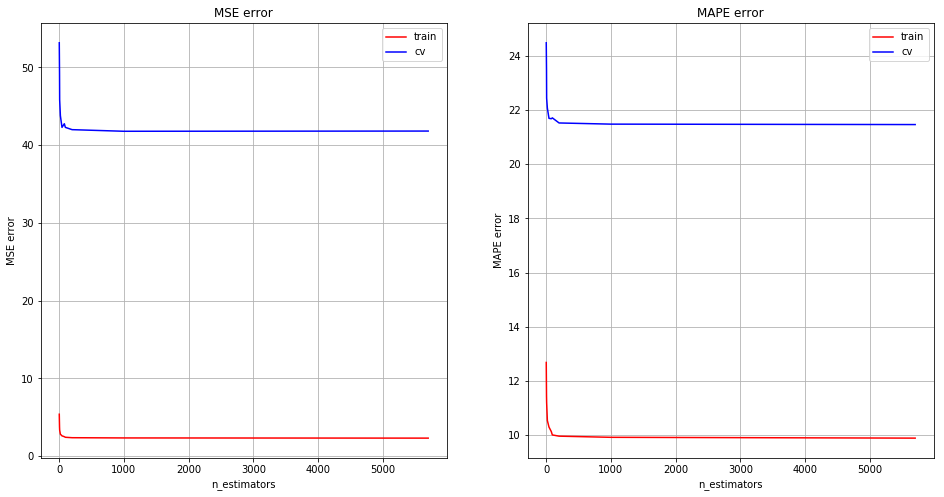

************************************************************************************************************************

test data mse for region 21 = 418.26391757910443
test data mape for region 21 = 8.913261304904875



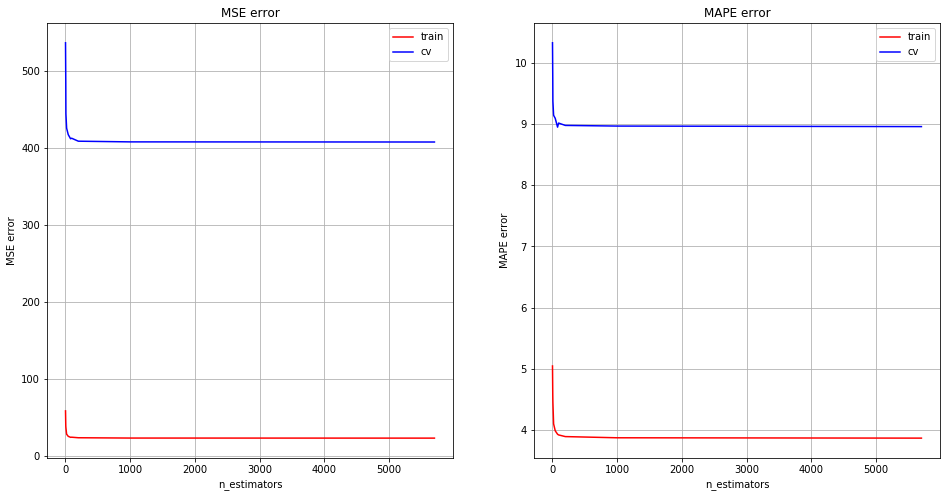

************************************************************************************************************************

test data mse for region 22 = 206.46501936298858
test data mape for region 22 = 9.71002215144675



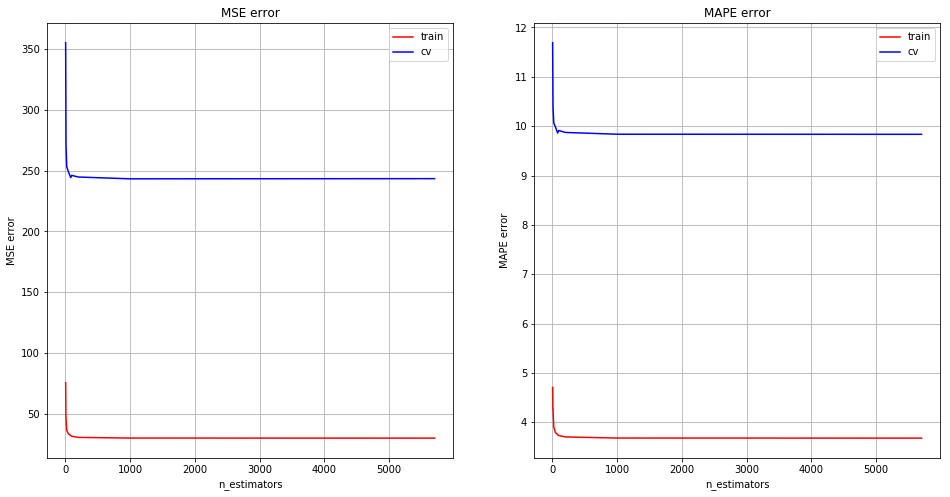

************************************************************************************************************************

test data mse for region 23 = 12.750761252931124
test data mape for region 23 = 39.86348021294919



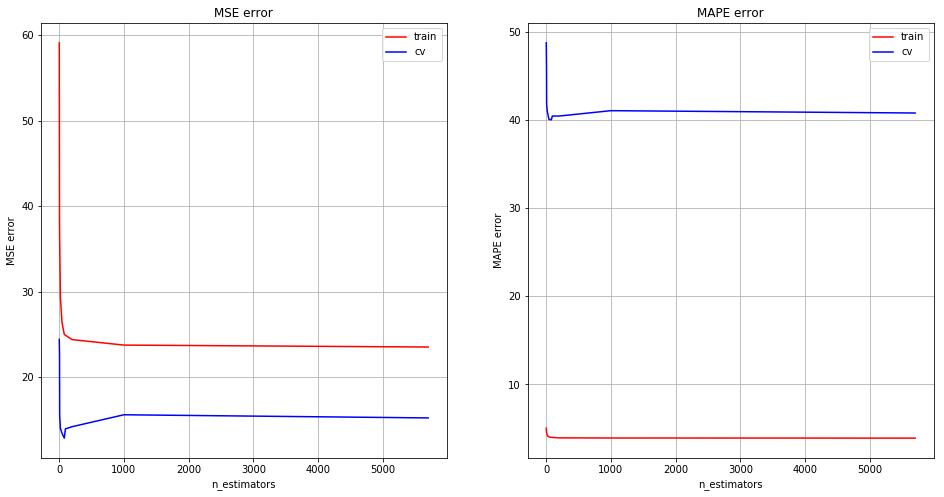

************************************************************************************************************************

test data mse for region 24 = 126.1182795257817
test data mape for region 24 = 10.39559193095784



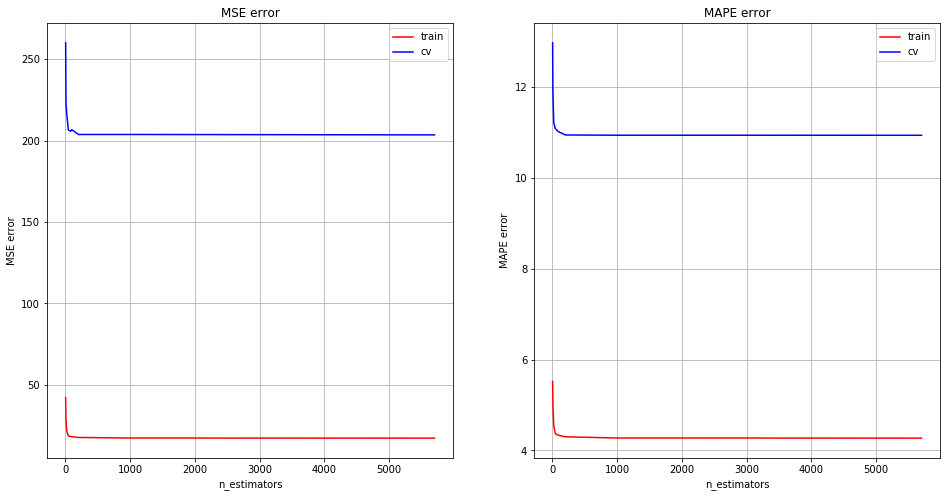

************************************************************************************************************************

test data mse for region 25 = 177.5228886405454
test data mape for region 25 = 10.240147915693349



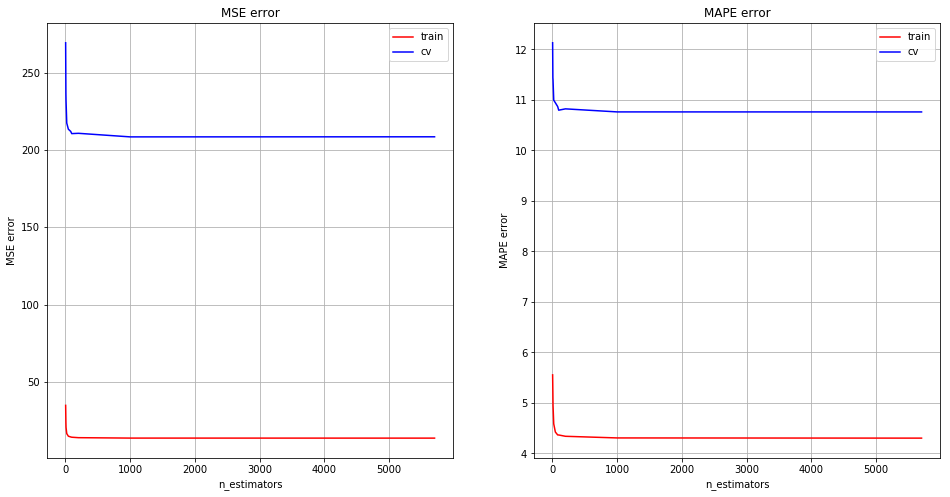

************************************************************************************************************************

test data mse for region 26 = 250.71534133517392
test data mape for region 26 = 9.59561863490203



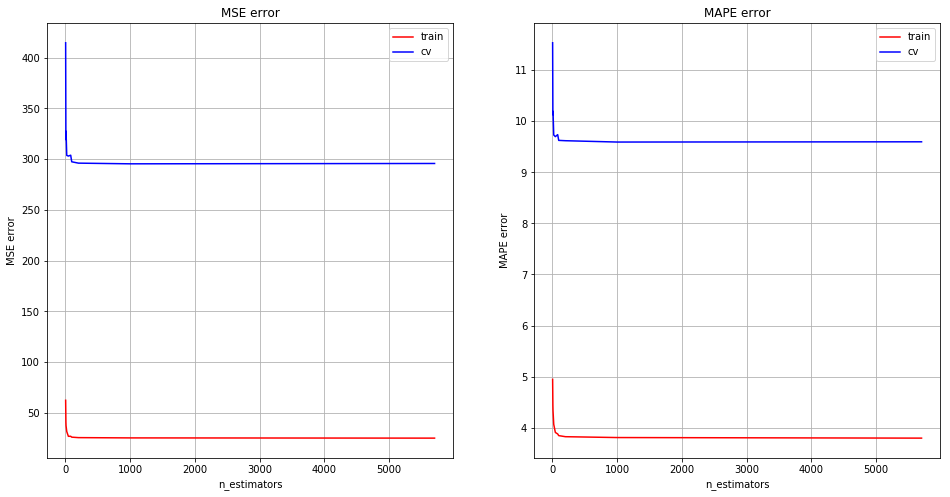

************************************************************************************************************************

test data mse for region 27 = 7.656097354550631
test data mape for region 27 = 42.2322497279259



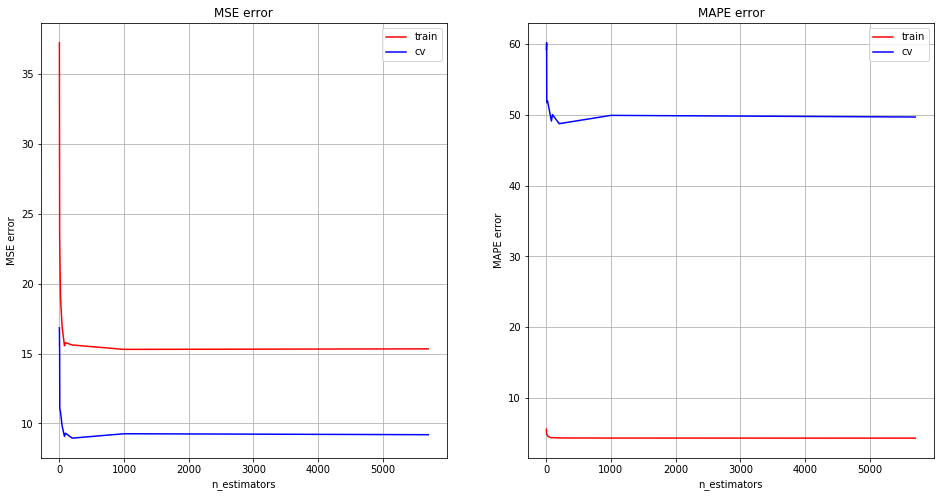

************************************************************************************************************************

test data mse for region 28 = 126.47409036843652
test data mape for region 28 = 11.810252090170652



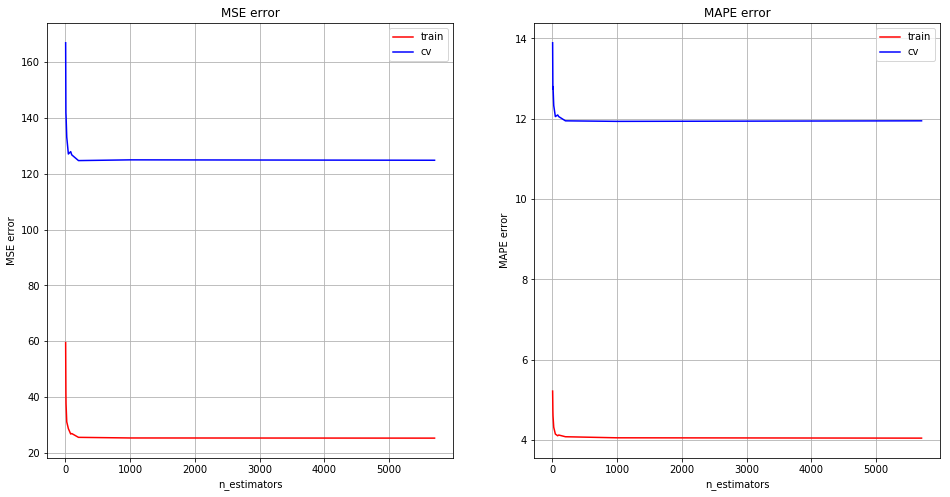

************************************************************************************************************************

test data mse for region 29 = 130.3688727690068
test data mape for region 29 = 11.563996302684057



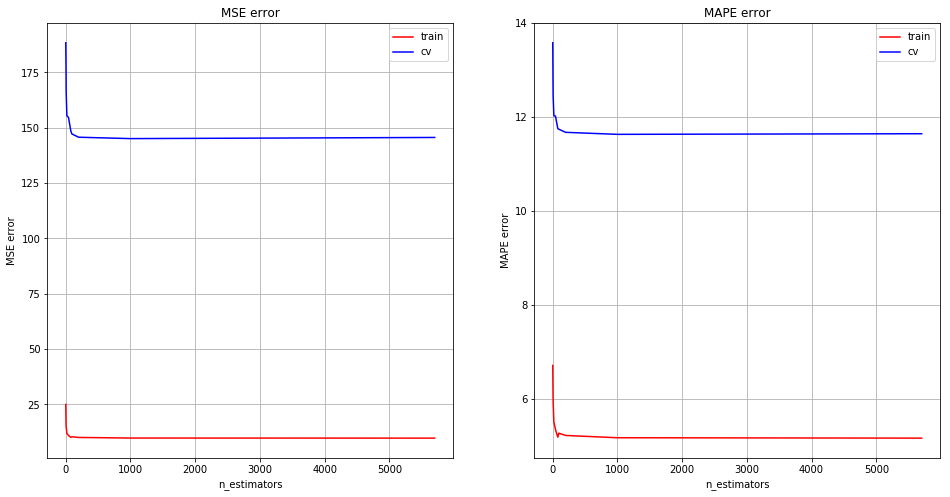

************************************************************************************************************************

test data mse for region 30 = 1.5867901497709358
test data mape for region 30 = 73.50879062357214



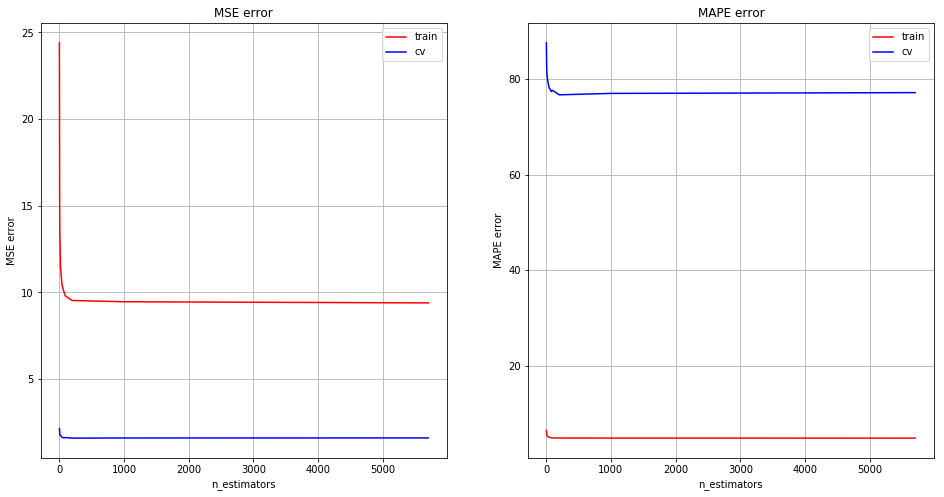

************************************************************************************************************************

test data mse for region 31 = 121.86887361906552
test data mape for region 31 = 11.483696399240054



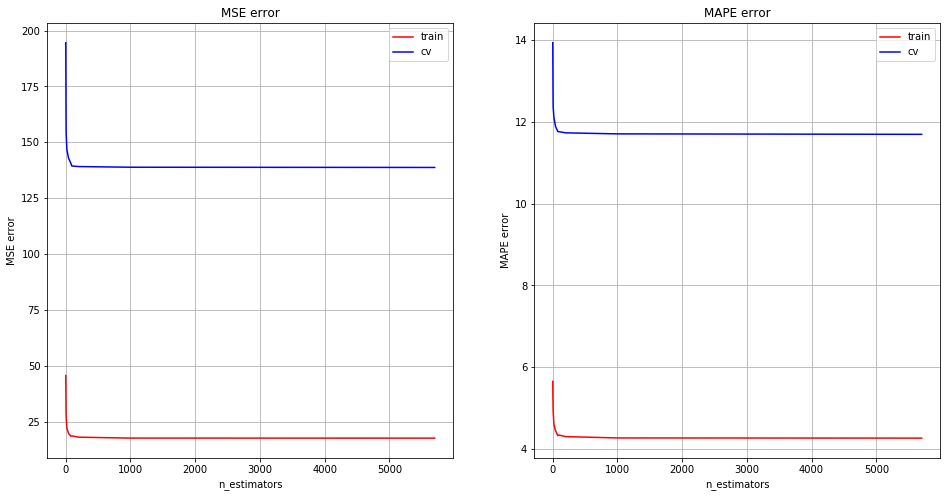

************************************************************************************************************************

test data mse for region 32 = 163.63882385196231
test data mape for region 32 = 10.715508377515603



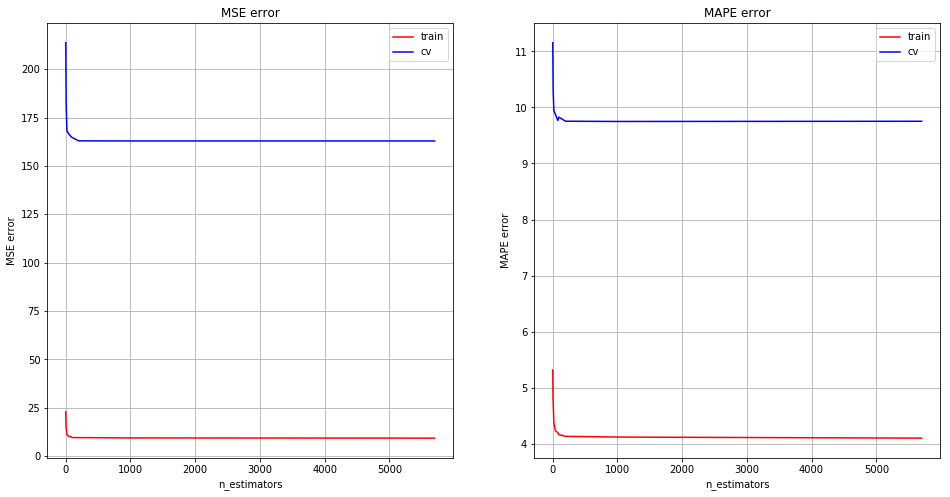

************************************************************************************************************************

test data mse for region 33 = 122.47174143148654
test data mape for region 33 = 10.706449557865616



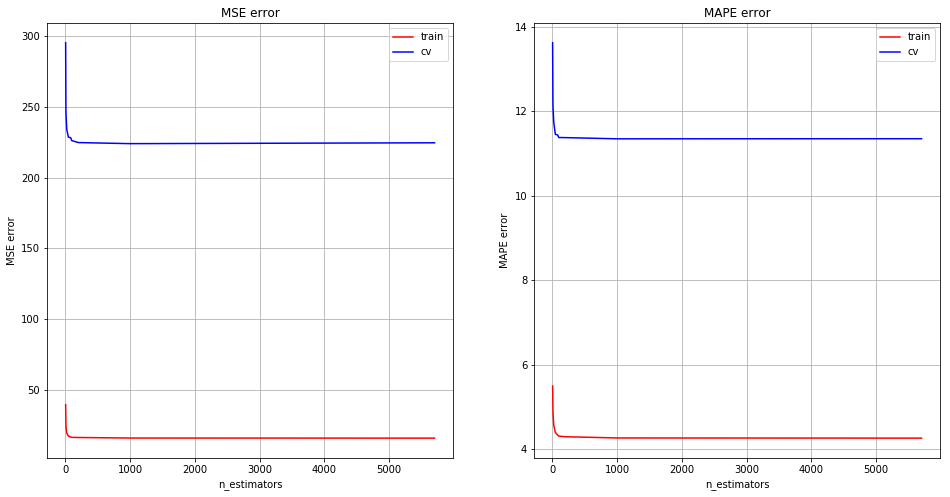

************************************************************************************************************************

test data mse for region 34 = 656.9034482283287
test data mape for region 34 = 12.632001088396066



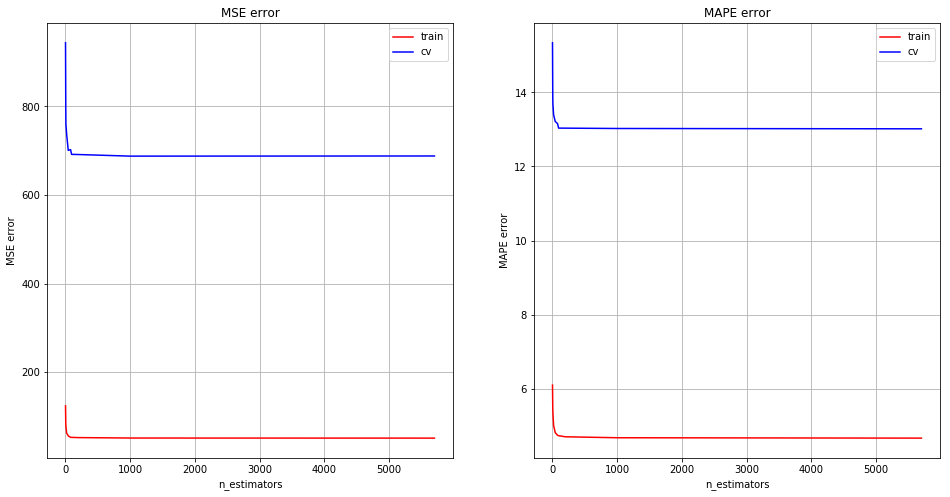

************************************************************************************************************************

test data mse for region 35 = 131.0491946227663
test data mape for region 35 = 11.52094578057499



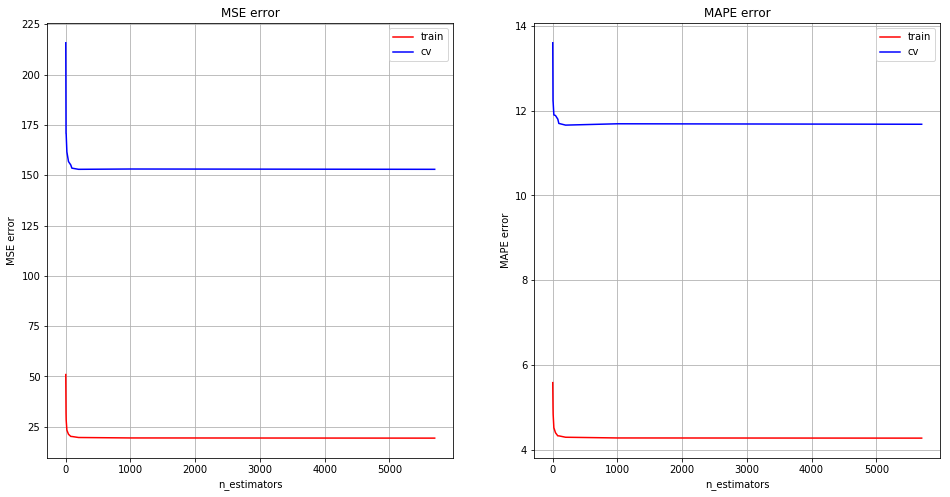

************************************************************************************************************************

test data mse for region 36 = 119.15055951760968
test data mape for region 36 = 12.13566598092412



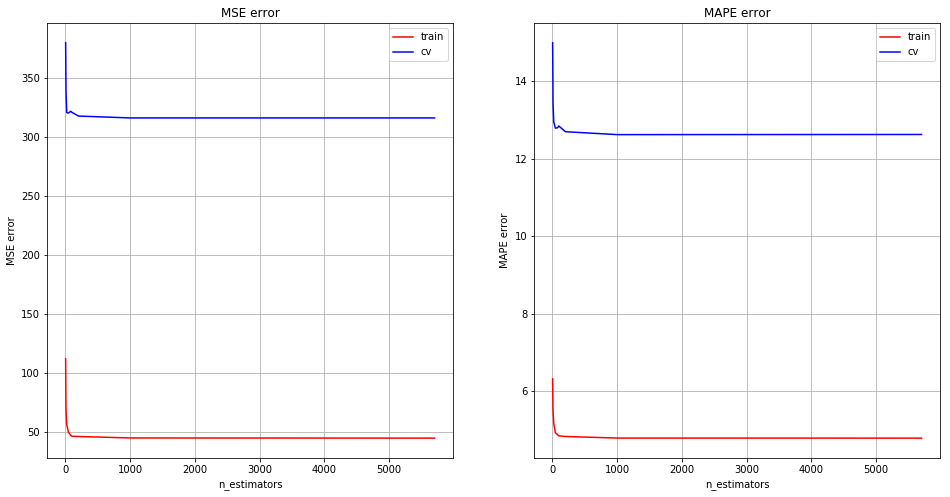

************************************************************************************************************************

test data mse for region 37 = 9.864722993386762
test data mape for region 37 = 35.25239419557677



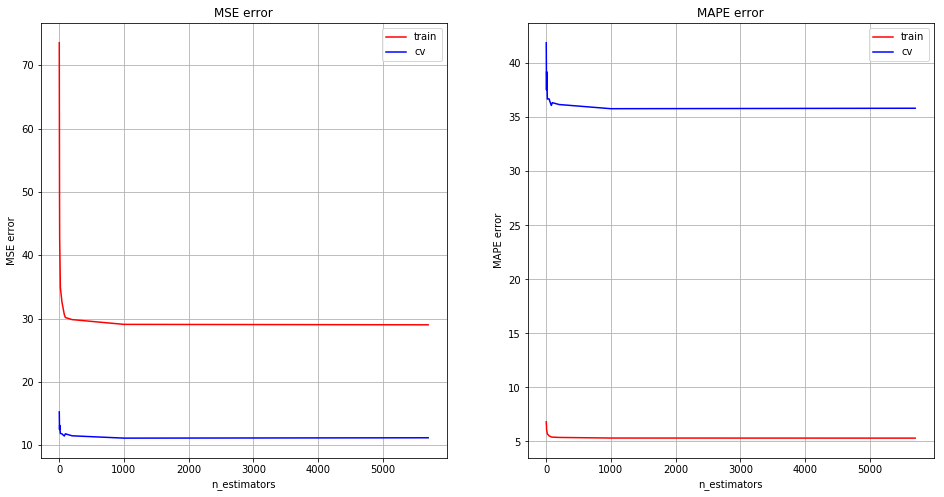

************************************************************************************************************************

test data mse for region 38 = 84.06055313062244
test data mape for region 38 = 12.527115727069065



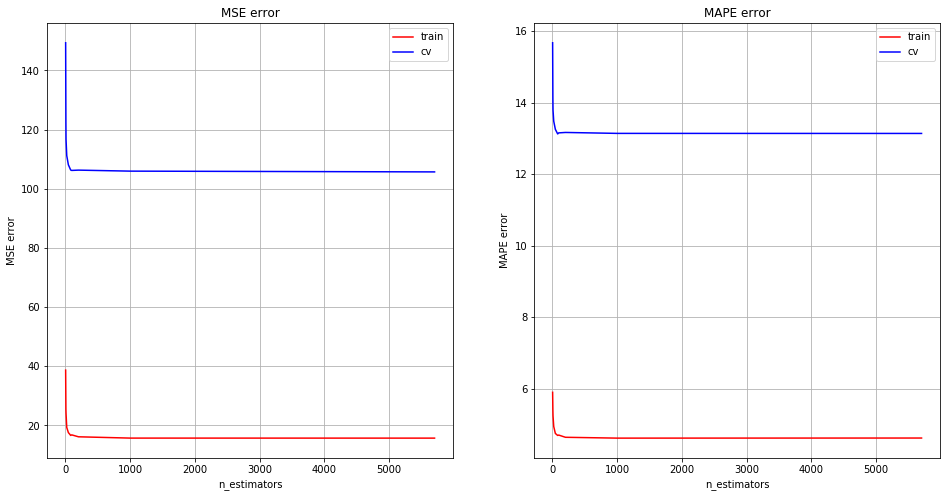

************************************************************************************************************************

test data mse for region 39 = 115.76679215935826
test data mape for region 39 = 11.478858015298426



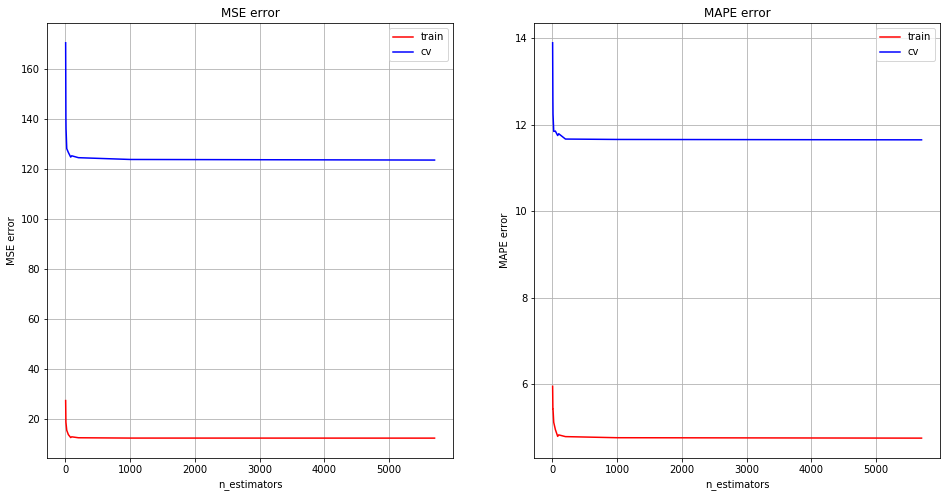

************************************************************************************************************************

average test error = 20.164973712326706


In [147]:
test_errors=[]
for r in range(40):
#     scaler=StandardScaler()
#     x_train_scaled=scaler.fit_transform(x_trains[r])
#     x_cv_scaled=scaler.transform(x_cvs[r])
#     x_test_scaled=scaler.transform(x_tests[r])
    
#     x_train_scaled=x_trains[r]
#     x_cv_scaled=x_cvs[r]
#     x_test_scaled=x_tests[r]
    
    alpha=[3, 7, 9, 20, 45, 81, 97, 201, 1001, 5701]
#     log_alpha=[x for x in np.arange(-40, 1, 1, float)]
    
    train_err_mse=[]
    cv_err_mse=[]
    
    train_err_mape=[]
    cv_err_mape=[]
    
    for a in alpha:
        model=RandomForestRegressor(n_estimators=a)
        model.fit(x_trains[r], y_trains[r])
        
        predictions_train=model.predict(x_trains[r])
        predictions_cv=model.predict(x_cvs[r])
        
        train_err_mse.append(get_mse(predictions_train, y_trains[r].values))
        cv_err_mse.append(get_mse(predictions_cv, y_cvs[r].values))
        
        train_err_mape.append(get_mape(predictions_train, y_trains[r].values))
        cv_err_mape.append(get_mape(predictions_cv, y_cvs[r].values))
        
#         print(f'train mape for region {r} with alpha = {a} : {train_err_mape[-1]}')
#         print(f'cv mape for region {r} with alpha = {a} : {cv_err_mape[-1]}\n')
        
#         print(f'train mape for region {r} with alpha = {a} : {train_err_mape[-1]}')
#         print(f'cv mape for region {r} with alpha = {a} : {cv_err_mape[-1]}\n')
    
    fig, (ax1, ax2)=plt.subplots(nrows=1, ncols=2)
    
    ax1.set_title('MSE error')
    ax1.plot(alpha, train_err_mse, 'r', label='train')
    ax1.plot(alpha, cv_err_mse, 'b', label='cv')
    ax1.set_xlabel('n_estimators')
    ax1.set_ylabel('MSE error')
    ax1.legend()
    ax1.grid()
    
    ax2.set_title('MAPE error')
    ax2.plot(alpha, train_err_mape, 'r', label='train')
    ax2.plot(alpha, cv_err_mape, 'b', label='cv')
    ax2.set_xlabel('n_estimators')
    ax2.set_ylabel('MAPE error')
    ax2.legend()
    ax2.grid()
    
    best_alpha=alpha[np.argmin(cv_err_mape)]
    best_model=RandomForestRegressor(n_estimators=best_alpha)
    model.fit(x_trains[r], y_trains[r])
    
    
    predictions_test=model.predict(x_tests[r])
    test_mape=get_mape(predictions_test, y_tests[r].values)
    test_errors.append(test_mape)
    print(f'test data mse for region {r} = {get_mse(predictions_test, y_tests[r].values)}')
    print(f'test data mape for region {r} = {test_mape}\n')
    plt.show()
    print('*'*120+'\n')

print(f'average test error = {np.mean(test_errors)}')

## GBDT Regressor

In [154]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd

In [150]:
type(x_trains[0])

pandas.core.frame.DataFrame

In [160]:
len(pd.concat((y_trains[0], y_cvs[0])))

9676

In [161]:
x_train_cvs=[]
y_train_cvs=[]

# x_train_cvs[i] = vstack(x_trains[i], x_cvs[i]) for i in range(40)

for i in range(40):
    x_train_cvs.append(pd.concat((x_trains[i], x_cvs[i]), axis=0))
    y_train_cvs.append(pd.concat((y_trains[i], y_cvs[i])))

In [176]:
test_errors=[]
for r in range(40):
    params={
        "n_estimators":[5, 10, 25, 50, 100, 500, 1000, 2000],
        "num_leaves ":[10, 25, 50, 100, 500],
        "colsample_bytree":[0.1,0.3,0.5,1],
        'subsample':[0.1,0.3,0.5,1],
        'learning_rate':[0.001,0.03,0.05,0.1]
    }

    x_cfl=lgb.LGBMRegressor(n_jobs=-1)
    random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=params,verbose=0,n_jobs=-1, 
                                   n_iter=60, return_train_score=True, scoring='neg_mean_squared_error')
    
    random_cfl1.fit(x_train_cvs[r], y_train_cvs[r])
    
    for j in range(60):
        print('for parameters:\n{}\nmean CV mse = {}\n'.format(random_cfl1.cv_results_['params'][j], 
                                                               random_cfl1.cv_results_['mean_test_score'][j]))
    
    predictions_test=random_cfl1.best_estimator_.predict(x_tests[r])
    test_mape=get_mape(predictions_test, y_tests[r].values)
    test_errors.append(test_mape)
    print(f'test data mse for region {r} = {get_mse(predictions_test, y_tests[r].values)}')
    print(f'test data mape for region {r} = {test_mape}\n')
    
    print('*'*120+'\n')

print(f'mean test error = {np.mean(test_errors)}')

for parameters:
{'subsample': 0.3, 'num_leaves ': 25, 'n_estimators': 50, 'learning_rate': 0.05, 'colsample_bytree': 0.5}
mean CV mse = -323.1998726728639

for parameters:
{'subsample': 0.1, 'num_leaves ': 25, 'n_estimators': 50, 'learning_rate': 0.001, 'colsample_bytree': 0.1}
mean CV mse = -2870.797070335311

for parameters:
{'subsample': 0.5, 'num_leaves ': 50, 'n_estimators': 50, 'learning_rate': 0.1, 'colsample_bytree': 0.3}
mean CV mse = -304.63693190265417

for parameters:
{'subsample': 1, 'num_leaves ': 500, 'n_estimators': 10, 'learning_rate': 0.03, 'colsample_bytree': 1}
mean CV mse = -1822.1070031432266

for parameters:
{'subsample': 0.1, 'num_leaves ': 50, 'n_estimators': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
mean CV mse = -658.1267397786834

for parameters:
{'subsample': 0.5, 'num_leaves ': 50, 'n_estimators': 1000, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
mean CV mse = -326.4829197574563

for parameters:
{'subsample': 0.3, 'num_leaves ': 25, 'n_estimato

for parameters:
{'subsample': 0.5, 'num_leaves ': 500, 'n_estimators': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.3}
mean CV mse = -1.4325552057040876

for parameters:
{'subsample': 0.3, 'num_leaves ': 50, 'n_estimators': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.3}
mean CV mse = -1.3768504282925313

for parameters:
{'subsample': 1, 'num_leaves ': 50, 'n_estimators': 25, 'learning_rate': 0.03, 'colsample_bytree': 1}
mean CV mse = -1.3166447796571177

for parameters:
{'subsample': 0.5, 'num_leaves ': 500, 'n_estimators': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.5}
mean CV mse = -1.3666485144141718

for parameters:
{'subsample': 1, 'num_leaves ': 500, 'n_estimators': 1000, 'learning_rate': 0.05, 'colsample_bytree': 1}
mean CV mse = -1.37116087101264

for parameters:
{'subsample': 0.1, 'num_leaves ': 500, 'n_estimators': 1000, 'learning_rate': 0.001, 'colsample_bytree': 0.3}
mean CV mse = -1.3057329625153908

for parameters:
{'subsample': 0.3, 'num_leaves ': 10, 'n_est

test data mse for region 1 = 1.6252904172020242
test data mape for region 1 = 75.7571243503662

************************************************************************************************************************

for parameters:
{'subsample': 0.1, 'num_leaves ': 100, 'n_estimators': 25, 'learning_rate': 0.03, 'colsample_bytree': 0.3}
mean CV mse = -835.5527405487265

for parameters:
{'subsample': 0.3, 'num_leaves ': 100, 'n_estimators': 2000, 'learning_rate': 0.03, 'colsample_bytree': 1}
mean CV mse = -177.7185516677215

for parameters:
{'subsample': 0.5, 'num_leaves ': 500, 'n_estimators': 50, 'learning_rate': 0.05, 'colsample_bytree': 0.3}
mean CV mse = -194.40959503182344

for parameters:
{'subsample': 0.1, 'num_leaves ': 25, 'n_estimators': 500, 'learning_rate': 0.03, 'colsample_bytree': 0.5}
mean CV mse = -165.0146030994147

for parameters:
{'subsample': 0.5, 'num_leaves ': 500, 'n_estimators': 1000, 'learning_rate': 0.03, 'colsample_bytree': 0.5}
mean CV mse = -169.229334813

test data mse for region 2 = 134.2745071375158
test data mape for region 2 = 10.481697463449768

************************************************************************************************************************

for parameters:
{'subsample': 0.5, 'num_leaves ': 500, 'n_estimators': 5, 'learning_rate': 0.03, 'colsample_bytree': 0.5}
mean CV mse = -1993.5756662682002

for parameters:
{'subsample': 0.5, 'num_leaves ': 10, 'n_estimators': 1000, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
mean CV mse = -393.6589552304474

for parameters:
{'subsample': 0.1, 'num_leaves ': 100, 'n_estimators': 1000, 'learning_rate': 0.05, 'colsample_bytree': 1}
mean CV mse = -382.658974617219

for parameters:
{'subsample': 1, 'num_leaves ': 50, 'n_estimators': 100, 'learning_rate': 0.001, 'colsample_bytree': 0.1}
mean CV mse = -2258.487873031159

for parameters:
{'subsample': 0.5, 'num_leaves ': 25, 'n_estimators': 500, 'learning_rate': 0.001, 'colsample_bytree': 1}
mean CV mse = -1182.1897444925933

for parameters:
{'subsample': 0.3, 'num_leaves ': 25, 'n_estimators': 100, 'learning_rate': 0.05, 'colsample_bytree': 0.5}
mean CV mse = -220.1297782319477

for parameters:
{'subsample': 0.1, 'num_leaves ': 500, 'n_estimators': 5, 'learning_rate': 0.1, 'colsample_bytree': 1}
mean CV mse = -1702.8157458228652

for parameters:
{'subsample': 1, 'num_leaves ': 500, 'n_estimators': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
mean CV mse = -1703.9774578972422

for parameters:
{'subsample': 0.1, 'num_leaves ': 10, 'n_estimators': 1000, 'learning_rate': 0.001, 'colsample_bytree': 0.3}
mean CV mse = -840.3931144687854

for parameters:
{'subsample': 0.5, 'num_leaves ': 50, 'n_estimators': 10, 'learning_rate': 0.03, 'colsample_bytree': 1}
mean CV mse = -2518.7773204231316

for parameters:
{'subsample': 0.3, 'num_leaves ': 10, 'n_estimators': 50, 'learning_rate': 0.05, 'colsample_bytree': 0.3}
mean CV mse = -265.1403269305547

for parameters:
{'subsample': 0.3, 'num_leaves ': 50, 'n_estimato

for parameters:
{'subsample': 0.3, 'num_leaves ': 100, 'n_estimators': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.1}
mean CV mse = -1202.308850067628

for parameters:
{'subsample': 0.3, 'num_leaves ': 50, 'n_estimators': 500, 'learning_rate': 0.03, 'colsample_bytree': 1}
mean CV mse = -388.56445496413744

for parameters:
{'subsample': 0.1, 'num_leaves ': 50, 'n_estimators': 2000, 'learning_rate': 0.05, 'colsample_bytree': 0.1}
mean CV mse = -415.76773294644346

for parameters:
{'subsample': 1, 'num_leaves ': 100, 'n_estimators': 1000, 'learning_rate': 0.05, 'colsample_bytree': 0.1}
mean CV mse = -408.7870290050745

for parameters:
{'subsample': 1, 'num_leaves ': 100, 'n_estimators': 50, 'learning_rate': 0.001, 'colsample_bytree': 0.3}
mean CV mse = -1784.8184124578795

for parameters:
{'subsample': 0.5, 'num_leaves ': 500, 'n_estimators': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
mean CV mse = -653.0414581201593

for parameters:
{'subsample': 0.1, 'num_leaves ': 10, 'n_e

for parameters:
{'subsample': 0.3, 'num_leaves ': 10, 'n_estimators': 50, 'learning_rate': 0.05, 'colsample_bytree': 0.3}
mean CV mse = -154.3889912655668

for parameters:
{'subsample': 0.5, 'num_leaves ': 10, 'n_estimators': 25, 'learning_rate': 0.1, 'colsample_bytree': 1}
mean CV mse = -145.53288162629843

for parameters:
{'subsample': 1, 'num_leaves ': 500, 'n_estimators': 5, 'learning_rate': 0.03, 'colsample_bytree': 0.1}
mean CV mse = -1993.7088760455683

for parameters:
{'subsample': 0.3, 'num_leaves ': 25, 'n_estimators': 1000, 'learning_rate': 0.05, 'colsample_bytree': 0.3}
mean CV mse = -137.10795410583023

for parameters:
{'subsample': 0.3, 'num_leaves ': 100, 'n_estimators': 2000, 'learning_rate': 0.1, 'colsample_bytree': 1}
mean CV mse = -144.91413340957166

for parameters:
{'subsample': 0.5, 'num_leaves ': 25, 'n_estimators': 50, 'learning_rate': 0.001, 'colsample_bytree': 0.1}
mean CV mse = -2336.924674397354

for parameters:
{'subsample': 0.3, 'num_leaves ': 100, 'n_esti

for parameters:
{'subsample': 0.5, 'num_leaves ': 100, 'n_estimators': 5, 'learning_rate': 0.03, 'colsample_bytree': 0.5}
mean CV mse = -6666.695329841255

for parameters:
{'subsample': 0.5, 'num_leaves ': 500, 'n_estimators': 500, 'learning_rate': 0.05, 'colsample_bytree': 0.1}
mean CV mse = -325.3347101182974

for parameters:
{'subsample': 0.3, 'num_leaves ': 25, 'n_estimators': 1000, 'learning_rate': 0.03, 'colsample_bytree': 1}
mean CV mse = -272.0815660152799

for parameters:
{'subsample': 0.5, 'num_leaves ': 25, 'n_estimators': 500, 'learning_rate': 0.05, 'colsample_bytree': 0.5}
mean CV mse = -270.33180944390534

for parameters:
{'subsample': 0.3, 'num_leaves ': 10, 'n_estimators': 1000, 'learning_rate': 0.05, 'colsample_bytree': 0.5}
mean CV mse = -276.15133231392554

for parameters:
{'subsample': 0.5, 'num_leaves ': 50, 'n_estimators': 100, 'learning_rate': 0.05, 'colsample_bytree': 0.3}
mean CV mse = -274.74192990200635

for parameters:
{'subsample': 0.3, 'num_leaves ': 500, 

for parameters:
{'subsample': 0.5, 'num_leaves ': 25, 'n_estimators': 1000, 'learning_rate': 0.03, 'colsample_bytree': 1}
mean CV mse = -1812.6400924421603

for parameters:
{'subsample': 0.1, 'num_leaves ': 100, 'n_estimators': 10, 'learning_rate': 0.001, 'colsample_bytree': 0.5}
mean CV mse = -6643.370844971456

for parameters:
{'subsample': 0.1, 'num_leaves ': 100, 'n_estimators': 500, 'learning_rate': 0.001, 'colsample_bytree': 0.3}
mean CV mse = -4308.40047303305

for parameters:
{'subsample': 0.3, 'num_leaves ': 25, 'n_estimators': 500, 'learning_rate': 0.001, 'colsample_bytree': 1}
mean CV mse = -4196.36260970393

for parameters:
{'subsample': 0.3, 'num_leaves ': 10, 'n_estimators': 100, 'learning_rate': 0.05, 'colsample_bytree': 0.5}
mean CV mse = -1966.7082931535383

for parameters:
{'subsample': 0.1, 'num_leaves ': 25, 'n_estimators': 1000, 'learning_rate': 0.03, 'colsample_bytree': 1}
mean CV mse = -1812.6400924421603

for parameters:
{'subsample': 0.5, 'num_leaves ': 25, 'n_

for parameters:
{'subsample': 0.1, 'num_leaves ': 10, 'n_estimators': 100, 'learning_rate': 0.03, 'colsample_bytree': 0.1}
mean CV mse = -158.11118180410963

for parameters:
{'subsample': 1, 'num_leaves ': 100, 'n_estimators': 5, 'learning_rate': 0.001, 'colsample_bytree': 0.5}
mean CV mse = -2819.225004261517

for parameters:
{'subsample': 0.3, 'num_leaves ': 25, 'n_estimators': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.3}
mean CV mse = -1759.0710261079528

for parameters:
{'subsample': 0.3, 'num_leaves ': 10, 'n_estimators': 100, 'learning_rate': 0.1, 'colsample_bytree': 1}
mean CV mse = -97.64642496981293

for parameters:
{'subsample': 0.5, 'num_leaves ': 50, 'n_estimators': 1000, 'learning_rate': 0.03, 'colsample_bytree': 1}
mean CV mse = -100.66268696550935

for parameters:
{'subsample': 0.5, 'num_leaves ': 10, 'n_estimators': 50, 'learning_rate': 0.001, 'colsample_bytree': 0.5}
mean CV mse = -2588.9722211386875

for parameters:
{'subsample': 0.5, 'num_leaves ': 500, 'n_esti

for parameters:
{'subsample': 0.3, 'num_leaves ': 10, 'n_estimators': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.1}
mean CV mse = -1126.6805415697374

for parameters:
{'subsample': 0.5, 'num_leaves ': 500, 'n_estimators': 2000, 'learning_rate': 0.001, 'colsample_bytree': 0.3}
mean CV mse = -191.66285846891165

for parameters:
{'subsample': 1, 'num_leaves ': 500, 'n_estimators': 5, 'learning_rate': 0.03, 'colsample_bytree': 0.1}
mean CV mse = -1851.7577842380706

for parameters:
{'subsample': 0.1, 'num_leaves ': 100, 'n_estimators': 5, 'learning_rate': 0.1, 'colsample_bytree': 1}
mean CV mse = -924.2016076641223

for parameters:
{'subsample': 0.1, 'num_leaves ': 10, 'n_estimators': 2000, 'learning_rate': 0.05, 'colsample_bytree': 0.5}
mean CV mse = -152.84859933294234

for parameters:
{'subsample': 0.5, 'num_leaves ': 50, 'n_estimators': 50, 'learning_rate': 0.03, 'colsample_bytree': 0.5}
mean CV mse = -255.61683975196158

for parameters:
{'subsample': 0.3, 'num_leaves ': 25, 'n_e

for parameters:
{'subsample': 0.3, 'num_leaves ': 10, 'n_estimators': 500, 'learning_rate': 0.03, 'colsample_bytree': 0.3}
mean CV mse = -124.36625312762122

for parameters:
{'subsample': 1, 'num_leaves ': 25, 'n_estimators': 10, 'learning_rate': 0.1, 'colsample_bytree': 1}
mean CV mse = -326.99778276912826

for parameters:
{'subsample': 0.3, 'num_leaves ': 10, 'n_estimators': 5, 'learning_rate': 0.03, 'colsample_bytree': 1}
mean CV mse = -1269.8905996817266

for parameters:
{'subsample': 0.1, 'num_leaves ': 500, 'n_estimators': 25, 'learning_rate': 0.05, 'colsample_bytree': 0.1}
mean CV mse = -369.4619022171769

for parameters:
{'subsample': 0.5, 'num_leaves ': 50, 'n_estimators': 100, 'learning_rate': 0.1, 'colsample_bytree': 1}
mean CV mse = -122.92699979532014

for parameters:
{'subsample': 0.3, 'num_leaves ': 100, 'n_estimators': 25, 'learning_rate': 0.1, 'colsample_bytree': 1}
mean CV mse = -133.7113077460161

for parameters:
{'subsample': 0.5, 'num_leaves ': 50, 'n_estimators': 

for parameters:
{'subsample': 0.1, 'num_leaves ': 25, 'n_estimators': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
mean CV mse = -1069.0209086521588

for parameters:
{'subsample': 0.1, 'num_leaves ': 500, 'n_estimators': 1000, 'learning_rate': 0.001, 'colsample_bytree': 0.5}
mean CV mse = -524.4376704906272

for parameters:
{'subsample': 0.3, 'num_leaves ': 100, 'n_estimators': 500, 'learning_rate': 0.001, 'colsample_bytree': 0.1}
mean CV mse = -1391.080170246843

for parameters:
{'subsample': 0.1, 'num_leaves ': 500, 'n_estimators': 2000, 'learning_rate': 0.001, 'colsample_bytree': 0.5}
mean CV mse = -210.55867217831556

for parameters:
{'subsample': 0.3, 'num_leaves ': 100, 'n_estimators': 25, 'learning_rate': 0.001, 'colsample_bytree': 1}
mean CV mse = -2626.034615679686

for parameters:
{'subsample': 0.3, 'num_leaves ': 100, 'n_estimators': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.3}
mean CV mse = -491.1249713277873

for parameters:
{'subsample': 0.5, 'num_leaves ': 50,

for parameters:
{'subsample': 1, 'num_leaves ': 10, 'n_estimators': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.1}
mean CV mse = -1555.59259598544

for parameters:
{'subsample': 1, 'num_leaves ': 10, 'n_estimators': 5, 'learning_rate': 0.001, 'colsample_bytree': 1}
mean CV mse = -3332.35637916817

for parameters:
{'subsample': 0.3, 'num_leaves ': 100, 'n_estimators': 100, 'learning_rate': 0.05, 'colsample_bytree': 0.5}
mean CV mse = -126.25664668083891

for parameters:
{'subsample': 0.3, 'num_leaves ': 500, 'n_estimators': 2000, 'learning_rate': 0.001, 'colsample_bytree': 0.5}
mean CV mse = -214.15101470320175

for parameters:
{'subsample': 0.1, 'num_leaves ': 25, 'n_estimators': 50, 'learning_rate': 0.05, 'colsample_bytree': 1}
mean CV mse = -183.19494946309808

for parameters:
{'subsample': 0.3, 'num_leaves ': 25, 'n_estimators': 500, 'learning_rate': 0.03, 'colsample_bytree': 0.5}
mean CV mse = -130.55455515767767

for parameters:
{'subsample': 0.3, 'num_leaves ': 500, 'n_estim

for parameters:
{'subsample': 0.3, 'num_leaves ': 50, 'n_estimators': 5, 'learning_rate': 0.03, 'colsample_bytree': 0.1}
mean CV mse = -219.31125863478312

for parameters:
{'subsample': 0.5, 'num_leaves ': 100, 'n_estimators': 25, 'learning_rate': 0.05, 'colsample_bytree': 0.5}
mean CV mse = -65.44339446485306

for parameters:
{'subsample': 0.1, 'num_leaves ': 100, 'n_estimators': 100, 'learning_rate': 0.1, 'colsample_bytree': 0.3}
mean CV mse = -44.68522324940078

for parameters:
{'subsample': 0.1, 'num_leaves ': 50, 'n_estimators': 500, 'learning_rate': 0.05, 'colsample_bytree': 0.3}
mean CV mse = -45.187649623370916

for parameters:
{'subsample': 0.1, 'num_leaves ': 500, 'n_estimators': 5, 'learning_rate': 0.05, 'colsample_bytree': 1}
mean CV mse = -179.7376527763447

for parameters:
{'subsample': 0.5, 'num_leaves ': 500, 'n_estimators': 5, 'learning_rate': 0.001, 'colsample_bytree': 0.5}
mean CV mse = -262.47276879132755

for parameters:
{'subsample': 0.3, 'num_leaves ': 100, 'n_es

for parameters:
{'subsample': 1, 'num_leaves ': 10, 'n_estimators': 100, 'learning_rate': 0.05, 'colsample_bytree': 0.1}
mean CV mse = -284.156207899794

for parameters:
{'subsample': 0.5, 'num_leaves ': 50, 'n_estimators': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
mean CV mse = -2190.370148776782

for parameters:
{'subsample': 0.5, 'num_leaves ': 100, 'n_estimators': 10, 'learning_rate': 0.001, 'colsample_bytree': 0.5}
mean CV mse = -5701.864271086629

for parameters:
{'subsample': 0.1, 'num_leaves ': 100, 'n_estimators': 1000, 'learning_rate': 0.03, 'colsample_bytree': 0.3}
mean CV mse = -221.24929164239725

for parameters:
{'subsample': 0.5, 'num_leaves ': 10, 'n_estimators': 500, 'learning_rate': 0.001, 'colsample_bytree': 0.3}
mean CV mse = -2332.524208433763

for parameters:
{'subsample': 0.5, 'num_leaves ': 25, 'n_estimators': 5, 'learning_rate': 0.001, 'colsample_bytree': 1}
mean CV mse = -5756.691461463021

for parameters:
{'subsample': 0.1, 'num_leaves ': 50, 'n_estim

for parameters:
{'subsample': 0.1, 'num_leaves ': 10, 'n_estimators': 10, 'learning_rate': 0.001, 'colsample_bytree': 1}
mean CV mse = -4355.6262330522695

for parameters:
{'subsample': 0.1, 'num_leaves ': 100, 'n_estimators': 25, 'learning_rate': 0.03, 'colsample_bytree': 1}
mean CV mse = -1178.7078281441827

for parameters:
{'subsample': 0.1, 'num_leaves ': 50, 'n_estimators': 5, 'learning_rate': 0.03, 'colsample_bytree': 0.3}
mean CV mse = -3352.886905759903

for parameters:
{'subsample': 0.1, 'num_leaves ': 10, 'n_estimators': 100, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
mean CV mse = -221.87594796390982

for parameters:
{'subsample': 0.1, 'num_leaves ': 10, 'n_estimators': 25, 'learning_rate': 0.05, 'colsample_bytree': 1}
mean CV mse = -572.42632853831

for parameters:
{'subsample': 0.1, 'num_leaves ': 100, 'n_estimators': 50, 'learning_rate': 0.001, 'colsample_bytree': 0.3}
mean CV mse = -4055.478530698283

for parameters:
{'subsample': 0.1, 'num_leaves ': 50, 'n_estimator

for parameters:
{'subsample': 1, 'num_leaves ': 10, 'n_estimators': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
mean CV mse = -547.17365862371

for parameters:
{'subsample': 0.3, 'num_leaves ': 50, 'n_estimators': 1000, 'learning_rate': 0.001, 'colsample_bytree': 0.3}
mean CV mse = -293.4932176085163

for parameters:
{'subsample': 0.1, 'num_leaves ': 100, 'n_estimators': 5, 'learning_rate': 0.001, 'colsample_bytree': 1}
mean CV mse = -1327.9655581335292

for parameters:
{'subsample': 1, 'num_leaves ': 100, 'n_estimators': 50, 'learning_rate': 0.001, 'colsample_bytree': 0.3}
mean CV mse = -1229.5351920750404

for parameters:
{'subsample': 0.1, 'num_leaves ': 50, 'n_estimators': 1000, 'learning_rate': 0.1, 'colsample_bytree': 1}
mean CV mse = -119.27239023005244

for parameters:
{'subsample': 0.1, 'num_leaves ': 100, 'n_estimators': 5, 'learning_rate': 0.001, 'colsample_bytree': 0.5}
mean CV mse = -1327.9875457676565

for parameters:
{'subsample': 0.3, 'num_leaves ': 50, 'n_estimat

for parameters:
{'subsample': 0.1, 'num_leaves ': 500, 'n_estimators': 10, 'learning_rate': 0.03, 'colsample_bytree': 1}
mean CV mse = -548.6985094632952

for parameters:
{'subsample': 0.1, 'num_leaves ': 25, 'n_estimators': 100, 'learning_rate': 0.05, 'colsample_bytree': 0.1}
mean CV mse = -56.88665615258015

for parameters:
{'subsample': 0.3, 'num_leaves ': 10, 'n_estimators': 5, 'learning_rate': 0.03, 'colsample_bytree': 0.1}
mean CV mse = -753.4220476553947

for parameters:
{'subsample': 0.1, 'num_leaves ': 50, 'n_estimators': 2000, 'learning_rate': 0.03, 'colsample_bytree': 0.5}
mean CV mse = -45.529317938480396

for parameters:
{'subsample': 0.3, 'num_leaves ': 25, 'n_estimators': 5, 'learning_rate': 0.03, 'colsample_bytree': 0.5}
mean CV mse = -724.8258283211933

for parameters:
{'subsample': 0.1, 'num_leaves ': 500, 'n_estimators': 50, 'learning_rate': 0.001, 'colsample_bytree': 0.5}
mean CV mse = -877.6395851169082

for parameters:
{'subsample': 0.3, 'num_leaves ': 100, 'n_est

for parameters:
{'subsample': 0.1, 'num_leaves ': 50, 'n_estimators': 25, 'learning_rate': 0.1, 'colsample_bytree': 0.1}
mean CV mse = -78.6610269092034

for parameters:
{'subsample': 0.3, 'num_leaves ': 100, 'n_estimators': 25, 'learning_rate': 0.05, 'colsample_bytree': 1}
mean CV mse = -95.58736772112182

for parameters:
{'subsample': 0.1, 'num_leaves ': 500, 'n_estimators': 25, 'learning_rate': 0.05, 'colsample_bytree': 1}
mean CV mse = -95.58736772112182

for parameters:
{'subsample': 1, 'num_leaves ': 500, 'n_estimators': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
mean CV mse = -99.72420475315481

for parameters:
{'subsample': 0.1, 'num_leaves ': 25, 'n_estimators': 50, 'learning_rate': 0.03, 'colsample_bytree': 0.1}
mean CV mse = -93.21518937145032

for parameters:
{'subsample': 1, 'num_leaves ': 100, 'n_estimators': 500, 'learning_rate': 0.03, 'colsample_bytree': 1}
mean CV mse = -72.96283573479782

for parameters:
{'subsample': 0.5, 'num_leaves ': 500, 'n_estimators': 1

test data mse for region 19 = 1.7403499425032058
test data mape for region 19 = 67.74837108320142

************************************************************************************************************************

for parameters:
{'subsample': 0.3, 'num_leaves ': 100, 'n_estimators': 100, 'learning_rate': 0.001, 'colsample_bytree': 0.5}
mean CV mse = -195.9615928468217

for parameters:
{'subsample': 1, 'num_leaves ': 25, 'n_estimators': 10, 'learning_rate': 0.03, 'colsample_bytree': 0.5}
mean CV mse = -138.02551765297034

for parameters:
{'subsample': 0.1, 'num_leaves ': 500, 'n_estimators': 500, 'learning_rate': 0.001, 'colsample_bytree': 0.1}
mean CV mse = -115.96550601732757

for parameters:
{'subsample': 1, 'num_leaves ': 100, 'n_estimators': 500, 'learning_rate': 0.1, 'colsample_bytree': 0.1}
mean CV mse = -25.95596411370686

for parameters:
{'subsample': 1, 'num_leaves ': 50, 'n_estimators': 100, 'learning_rate': 0.1, 'colsample_bytree': 1}
mean CV mse = -23.12193521041953

for parameters:
{'subsample': 1, 'num_leaves ': 25, 'n_estimators': 25, 'learning_rate': 0.05, 'colsample_bytree': 0.1}
mean CV mse = -1816.9122468043706

for parameters:
{'subsample': 0.1, 'num_leaves ': 100, 'n_estimators': 2000, 'learning_rate': 0.001, 'colsample_bytree': 0.5}
mean CV mse = -511.22663495549335

for parameters:
{'subsample': 1, 'num_leaves ': 500, 'n_estimators': 50, 'learning_rate': 0.001, 'colsample_bytree': 0.5}
mean CV mse = -12683.694218246985

for parameters:
{'subsample': 1, 'num_leaves ': 500, 'n_estimators': 1000, 'learning_rate': 0.05, 'colsample_bytree': 1}
mean CV mse = -243.70207838843484

for parameters:
{'subsample': 0.3, 'num_leaves ': 25, 'n_estimators': 100, 'learning_rate': 0.001, 'colsample_bytree': 0.3}
mean CV mse = -11546.117970369738

for parameters:
{'subsample': 1, 'num_leaves ': 100, 'n_estimators': 2000, 'learning_rate': 0.1, 'colsample_bytree': 0.3}
mean CV mse = -250.53019210885444

for parameters:
{'subsample': 0.3, 'num_leaves ': 500, 

for parameters:
{'subsample': 1, 'num_leaves ': 10, 'n_estimators': 500, 'learning_rate': 0.1, 'colsample_bytree': 0.3}
mean CV mse = -259.3018812018538

for parameters:
{'subsample': 0.5, 'num_leaves ': 100, 'n_estimators': 500, 'learning_rate': 0.05, 'colsample_bytree': 0.3}
mean CV mse = -251.70325033070768

for parameters:
{'subsample': 1, 'num_leaves ': 10, 'n_estimators': 50, 'learning_rate': 0.1, 'colsample_bytree': 1}
mean CV mse = -242.5353766943265

for parameters:
{'subsample': 0.3, 'num_leaves ': 50, 'n_estimators': 5, 'learning_rate': 0.03, 'colsample_bytree': 0.3}
mean CV mse = -6106.48811030035

for parameters:
{'subsample': 0.1, 'num_leaves ': 100, 'n_estimators': 25, 'learning_rate': 0.1, 'colsample_bytree': 0.1}
mean CV mse = -535.3415278579743

for parameters:
{'subsample': 1, 'num_leaves ': 10, 'n_estimators': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.1}
mean CV mse = -1895.784034230387

for parameters:
{'subsample': 0.3, 'num_leaves ': 25, 'n_estimators': 100

for parameters:
{'subsample': 0.3, 'num_leaves ': 500, 'n_estimators': 2000, 'learning_rate': 0.1, 'colsample_bytree': 0.3}
mean CV mse = -317.282614652593

for parameters:
{'subsample': 0.1, 'num_leaves ': 25, 'n_estimators': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.3}
mean CV mse = -6702.341894151535

for parameters:
{'subsample': 0.1, 'num_leaves ': 25, 'n_estimators': 2000, 'learning_rate': 0.1, 'colsample_bytree': 0.1}
mean CV mse = -391.17437700244705

for parameters:
{'subsample': 0.1, 'num_leaves ': 500, 'n_estimators': 50, 'learning_rate': 0.05, 'colsample_bytree': 0.5}
mean CV mse = -454.9518900935136

for parameters:
{'subsample': 0.5, 'num_leaves ': 25, 'n_estimators': 500, 'learning_rate': 0.001, 'colsample_bytree': 0.3}
mean CV mse = -4377.5954502306695

for parameters:
{'subsample': 0.5, 'num_leaves ': 100, 'n_estimators': 500, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
mean CV mse = -316.42648311693733

for parameters:
{'subsample': 0.3, 'num_leaves ': 500, '

for parameters:
{'subsample': 0.3, 'num_leaves ': 500, 'n_estimators': 100, 'learning_rate': 0.001, 'colsample_bytree': 0.1}
mean CV mse = -3639.261660874951

for parameters:
{'subsample': 0.3, 'num_leaves ': 10, 'n_estimators': 1000, 'learning_rate': 0.03, 'colsample_bytree': 0.5}
mean CV mse = -172.5865712593466

for parameters:
{'subsample': 0.5, 'num_leaves ': 25, 'n_estimators': 50, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
mean CV mse = -163.43580558682373

for parameters:
{'subsample': 0.1, 'num_leaves ': 100, 'n_estimators': 1000, 'learning_rate': 0.1, 'colsample_bytree': 0.1}
mean CV mse = -226.31764516635417

for parameters:
{'subsample': 1, 'num_leaves ': 500, 'n_estimators': 500, 'learning_rate': 0.05, 'colsample_bytree': 0.3}
mean CV mse = -181.04656426719222

for parameters:
{'subsample': 0.1, 'num_leaves ': 500, 'n_estimators': 1000, 'learning_rate': 0.001, 'colsample_bytree': 0.3}
mean CV mse = -747.3650088451129

for parameters:
{'subsample': 1, 'num_leaves ': 500

for parameters:
{'subsample': 0.1, 'num_leaves ': 25, 'n_estimators': 1000, 'learning_rate': 0.03, 'colsample_bytree': 0.1}
mean CV mse = -163.88039678957765

for parameters:
{'subsample': 0.5, 'num_leaves ': 500, 'n_estimators': 5, 'learning_rate': 0.03, 'colsample_bytree': 1}
mean CV mse = -3918.0949169723835

for parameters:
{'subsample': 0.3, 'num_leaves ': 50, 'n_estimators': 25, 'learning_rate': 0.001, 'colsample_bytree': 1}
mean CV mse = -4997.8477582558035

for parameters:
{'subsample': 0.3, 'num_leaves ': 100, 'n_estimators': 500, 'learning_rate': 0.03, 'colsample_bytree': 0.1}
mean CV mse = -165.55643134216376

for parameters:
{'subsample': 0.5, 'num_leaves ': 100, 'n_estimators': 500, 'learning_rate': 0.03, 'colsample_bytree': 0.1}
mean CV mse = -165.55643134216376

for parameters:
{'subsample': 1, 'num_leaves ': 10, 'n_estimators': 50, 'learning_rate': 0.001, 'colsample_bytree': 1}
mean CV mse = -4764.214008155704

for parameters:
{'subsample': 0.3, 'num_leaves ': 25, 'n_es

test data mse for region 25 = 170.28366570938616
test data mape for region 25 = 10.15801204861604

************************************************************************************************************************

for parameters:
{'subsample': 0.5, 'num_leaves ': 500, 'n_estimators': 2000, 'learning_rate': 0.1, 'colsample_bytree': 1}
mean CV mse = -247.7751594415854

for parameters:
{'subsample': 1, 'num_leaves ': 100, 'n_estimators': 25, 'learning_rate': 0.1, 'colsample_bytree': 0.1}
mean CV mse = -369.69055717749404

for parameters:
{'subsample': 0.1, 'num_leaves ': 50, 'n_estimators': 2000, 'learning_rate': 0.03, 'colsample_bytree': 0.1}
mean CV mse = -249.38659755746355

for parameters:
{'subsample': 1, 'num_leaves ': 25, 'n_estimators': 5, 'learning_rate': 0.03, 'colsample_bytree': 0.1}
mean CV mse = -3608.530281643204

for parameters:
{'subsample': 0.1, 'num_leaves ': 100, 'n_estimators': 1000, 'learning_rate': 0.05, 'colsample_bytree': 0.5}
mean CV mse = -230.062659702901

test data mse for region 26 = 247.49532423239748
test data mape for region 26 = 9.576508174174766

************************************************************************************************************************

for parameters:
{'subsample': 0.3, 'num_leaves ': 10, 'n_estimators': 2000, 'learning_rate': 0.001, 'colsample_bytree': 1}
mean CV mse = -190.24748147962646

for parameters:
{'subsample': 0.5, 'num_leaves ': 100, 'n_estimators': 1000, 'learning_rate': 0.03, 'colsample_bytree': 1}
mean CV mse = -125.3799336260119

for parameters:
{'subsample': 1, 'num_leaves ': 10, 'n_estimators': 100, 'learning_rate': 0.03, 'colsample_bytree': 0.5}
mean CV mse = -114.42495708273448

for parameters:
{'subsample': 0.5, 'num_leaves ': 100, 'n_estimators': 25, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
mean CV mse = -128.06009605288455

for parameters:
{'subsample': 0.3, 'num_leaves ': 500, 'n_estimators': 2000, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
mean CV mse = -134.16609319

for parameters:
{'subsample': 0.1, 'num_leaves ': 25, 'n_estimators': 50, 'learning_rate': 0.03, 'colsample_bytree': 0.3}
mean CV mse = -558.7814596213428

for parameters:
{'subsample': 0.3, 'num_leaves ': 50, 'n_estimators': 5, 'learning_rate': 0.001, 'colsample_bytree': 0.1}
mean CV mse = -4699.5993023831315

for parameters:
{'subsample': 0.1, 'num_leaves ': 500, 'n_estimators': 1000, 'learning_rate': 0.001, 'colsample_bytree': 0.3}
mean CV mse = -977.6092468093484

for parameters:
{'subsample': 1, 'num_leaves ': 10, 'n_estimators': 2000, 'learning_rate': 0.001, 'colsample_bytree': 0.3}
mean CV mse = -375.2907886000523

for parameters:
{'subsample': 1, 'num_leaves ': 500, 'n_estimators': 50, 'learning_rate': 0.03, 'colsample_bytree': 0.5}
mean CV mse = -536.942011023031

for parameters:
{'subsample': 0.5, 'num_leaves ': 10, 'n_estimators': 25, 'learning_rate': 0.03, 'colsample_bytree': 0.5}
mean CV mse = -1346.502292051022

for parameters:
{'subsample': 1, 'num_leaves ': 500, 'n_esti

test data mse for region 28 = 114.2013047020534
test data mape for region 28 = 11.658749405415481

************************************************************************************************************************

for parameters:
{'subsample': 0.3, 'num_leaves ': 10, 'n_estimators': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
mean CV mse = -1127.920551980378

for parameters:
{'subsample': 0.5, 'num_leaves ': 50, 'n_estimators': 25, 'learning_rate': 0.03, 'colsample_bytree': 1}
mean CV mse = -744.237418707582

for parameters:
{'subsample': 0.3, 'num_leaves ': 100, 'n_estimators': 500, 'learning_rate': 0.001, 'colsample_bytree': 0.3}
mean CV mse = -1192.743407541781

for parameters:
{'subsample': 1, 'num_leaves ': 50, 'n_estimators': 100, 'learning_rate': 0.03, 'colsample_bytree': 1}
mean CV mse = -98.61692045907276

for parameters:
{'subsample': 0.3, 'num_leaves ': 500, 'n_estimators': 2000, 'learning_rate': 0.05, 'colsample_bytree': 0.1}
mean CV mse = -107.88392936274188



test data mse for region 29 = 124.73634294034494
test data mape for region 29 = 11.355258679652263

************************************************************************************************************************

for parameters:
{'subsample': 1, 'num_leaves ': 50, 'n_estimators': 1000, 'learning_rate': 0.05, 'colsample_bytree': 0.5}
mean CV mse = -82.71231159326838

for parameters:
{'subsample': 0.1, 'num_leaves ': 25, 'n_estimators': 500, 'learning_rate': 0.05, 'colsample_bytree': 0.1}
mean CV mse = -99.3745834744621

for parameters:
{'subsample': 0.5, 'num_leaves ': 25, 'n_estimators': 2000, 'learning_rate': 0.03, 'colsample_bytree': 0.1}
mean CV mse = -97.74749415564672

for parameters:
{'subsample': 0.3, 'num_leaves ': 50, 'n_estimators': 25, 'learning_rate': 0.1, 'colsample_bytree': 1}
mean CV mse = -91.09024256287061

for parameters:
{'subsample': 1, 'num_leaves ': 25, 'n_estimators': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.1}
mean CV mse = -1683.8003305064003

f

for parameters:
{'subsample': 0.5, 'num_leaves ': 25, 'n_estimators': 2000, 'learning_rate': 0.05, 'colsample_bytree': 0.3}
mean CV mse = -150.4021337800795

for parameters:
{'subsample': 0.1, 'num_leaves ': 100, 'n_estimators': 25, 'learning_rate': 0.05, 'colsample_bytree': 1}
mean CV mse = -274.2019890398868

for parameters:
{'subsample': 0.3, 'num_leaves ': 25, 'n_estimators': 50, 'learning_rate': 0.001, 'colsample_bytree': 0.1}
mean CV mse = -1661.022688959569

for parameters:
{'subsample': 0.1, 'num_leaves ': 10, 'n_estimators': 10, 'learning_rate': 0.001, 'colsample_bytree': 0.3}
mean CV mse = -1747.5679589910771

for parameters:
{'subsample': 0.1, 'num_leaves ': 25, 'n_estimators': 100, 'learning_rate': 0.05, 'colsample_bytree': 1}
mean CV mse = -138.43597396805367

for parameters:
{'subsample': 0.1, 'num_leaves ': 100, 'n_estimators': 1000, 'learning_rate': 0.05, 'colsample_bytree': 1}
mean CV mse = -146.98005231065028

for parameters:
{'subsample': 0.5, 'num_leaves ': 10, 'n_e

for parameters:
{'subsample': 0.5, 'num_leaves ': 500, 'n_estimators': 500, 'learning_rate': 0.05, 'colsample_bytree': 0.3}
mean CV mse = -94.26924562168438

for parameters:
{'subsample': 0.1, 'num_leaves ': 50, 'n_estimators': 10, 'learning_rate': 0.001, 'colsample_bytree': 0.5}
mean CV mse = -5463.4657854190145

for parameters:
{'subsample': 1, 'num_leaves ': 50, 'n_estimators': 2000, 'learning_rate': 0.05, 'colsample_bytree': 0.3}
mean CV mse = -98.38251233225328

for parameters:
{'subsample': 0.3, 'num_leaves ': 10, 'n_estimators': 1000, 'learning_rate': 0.1, 'colsample_bytree': 0.1}
mean CV mse = -119.74670717763745

for parameters:
{'subsample': 0.3, 'num_leaves ': 25, 'n_estimators': 100, 'learning_rate': 0.001, 'colsample_bytree': 0.5}
mean CV mse = -4583.719159506444

for parameters:
{'subsample': 0.1, 'num_leaves ': 500, 'n_estimators': 2000, 'learning_rate': 0.03, 'colsample_bytree': 1}
mean CV mse = -101.52874136180284

for parameters:
{'subsample': 0.3, 'num_leaves ': 100,

test data mse for region 32 = 158.54346343403753
test data mape for region 32 = 10.631765277087483

************************************************************************************************************************

for parameters:
{'subsample': 0.3, 'num_leaves ': 100, 'n_estimators': 500, 'learning_rate': 0.001, 'colsample_bytree': 0.1}
mean CV mse = -1218.428088552489

for parameters:
{'subsample': 1, 'num_leaves ': 10, 'n_estimators': 50, 'learning_rate': 0.03, 'colsample_bytree': 0.3}
mean CV mse = -275.0982903130128

for parameters:
{'subsample': 0.3, 'num_leaves ': 100, 'n_estimators': 50, 'learning_rate': 0.001, 'colsample_bytree': 0.3}
mean CV mse = -2187.9065597217973

for parameters:
{'subsample': 1, 'num_leaves ': 50, 'n_estimators': 50, 'learning_rate': 0.001, 'colsample_bytree': 0.1}
mean CV mse = -2234.3061253750743

for parameters:
{'subsample': 1, 'num_leaves ': 100, 'n_estimators': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
mean CV mse = -427.02922744445

test data mse for region 33 = 121.3451651425959
test data mape for region 33 = 10.672186649543244

************************************************************************************************************************

for parameters:
{'subsample': 0.5, 'num_leaves ': 100, 'n_estimators': 1000, 'learning_rate': 0.1, 'colsample_bytree': 0.3}
mean CV mse = -482.36327946798343

for parameters:
{'subsample': 0.3, 'num_leaves ': 25, 'n_estimators': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.3}
mean CV mse = -3741.1300385055947

for parameters:
{'subsample': 0.1, 'num_leaves ': 50, 'n_estimators': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
mean CV mse = -2387.1731737903956

for parameters:
{'subsample': 0.3, 'num_leaves ': 100, 'n_estimators': 25, 'learning_rate': 0.03, 'colsample_bytree': 0.3}
mean CV mse = -1737.1499066962213

for parameters:
{'subsample': 0.1, 'num_leaves ': 500, 'n_estimators': 2000, 'learning_rate': 0.03, 'colsample_bytree': 0.5}
mean CV mse = -470.1942706

for parameters:
{'subsample': 0.5, 'num_leaves ': 500, 'n_estimators': 500, 'learning_rate': 0.03, 'colsample_bytree': 0.5}
mean CV mse = -157.2932840664675

for parameters:
{'subsample': 1, 'num_leaves ': 100, 'n_estimators': 500, 'learning_rate': 0.1, 'colsample_bytree': 1}
mean CV mse = -165.29630741067396

for parameters:
{'subsample': 0.3, 'num_leaves ': 500, 'n_estimators': 50, 'learning_rate': 0.05, 'colsample_bytree': 0.3}
mean CV mse = -182.2033452124632

for parameters:
{'subsample': 0.5, 'num_leaves ': 10, 'n_estimators': 2000, 'learning_rate': 0.05, 'colsample_bytree': 0.3}
mean CV mse = -168.3747778280779

for parameters:
{'subsample': 0.3, 'num_leaves ': 10, 'n_estimators': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.1}
mean CV mse = -1316.885654600257

for parameters:
{'subsample': 0.3, 'num_leaves ': 500, 'n_estimators': 100, 'learning_rate': 0.05, 'colsample_bytree': 0.3}
mean CV mse = -157.74130017758304

for parameters:
{'subsample': 0.5, 'num_leaves ': 10, 'n_e

for parameters:
{'subsample': 0.5, 'num_leaves ': 500, 'n_estimators': 1000, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
mean CV mse = -383.6735466864069

for parameters:
{'subsample': 0.3, 'num_leaves ': 25, 'n_estimators': 500, 'learning_rate': 0.001, 'colsample_bytree': 0.1}
mean CV mse = -3070.406975448152

for parameters:
{'subsample': 0.3, 'num_leaves ': 10, 'n_estimators': 500, 'learning_rate': 0.05, 'colsample_bytree': 1}
mean CV mse = -366.9849258331193

for parameters:
{'subsample': 0.3, 'num_leaves ': 50, 'n_estimators': 100, 'learning_rate': 0.03, 'colsample_bytree': 1}
mean CV mse = -362.09765305817524

for parameters:
{'subsample': 0.1, 'num_leaves ': 50, 'n_estimators': 25, 'learning_rate': 0.001, 'colsample_bytree': 0.1}
mean CV mse = -6108.576345390325

for parameters:
{'subsample': 1, 'num_leaves ': 500, 'n_estimators': 100, 'learning_rate': 0.001, 'colsample_bytree': 0.1}
mean CV mse = -5480.504775812724

for parameters:
{'subsample': 0.5, 'num_leaves ': 10, 'n_es

for parameters:
{'subsample': 0.1, 'num_leaves ': 50, 'n_estimators': 25, 'learning_rate': 0.03, 'colsample_bytree': 0.1}
mean CV mse = -1939.975733256018

for parameters:
{'subsample': 0.5, 'num_leaves ': 25, 'n_estimators': 25, 'learning_rate': 0.05, 'colsample_bytree': 0.1}
mean CV mse = -1127.8411494547643

for parameters:
{'subsample': 1, 'num_leaves ': 10, 'n_estimators': 500, 'learning_rate': 0.1, 'colsample_bytree': 0.1}
mean CV mse = -465.7917048613838

for parameters:
{'subsample': 0.1, 'num_leaves ': 500, 'n_estimators': 50, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
mean CV mse = -358.2534641821611

for parameters:
{'subsample': 1, 'num_leaves ': 25, 'n_estimators': 50, 'learning_rate': 0.05, 'colsample_bytree': 0.3}
mean CV mse = -450.9949265399482

for parameters:
{'subsample': 0.1, 'num_leaves ': 10, 'n_estimators': 10, 'learning_rate': 0.001, 'colsample_bytree': 0.1}
mean CV mse = -5480.842574584439

for parameters:
{'subsample': 0.1, 'num_leaves ': 10, 'n_estimator

test data mse for region 37 = 9.784413927880594
test data mape for region 37 = 35.62639871973277

************************************************************************************************************************

for parameters:
{'subsample': 0.3, 'num_leaves ': 100, 'n_estimators': 10, 'learning_rate': 0.03, 'colsample_bytree': 0.1}
mean CV mse = -1412.601291890295

for parameters:
{'subsample': 0.1, 'num_leaves ': 10, 'n_estimators': 5, 'learning_rate': 0.1, 'colsample_bytree': 1}
mean CV mse = -871.5538585859831

for parameters:
{'subsample': 0.1, 'num_leaves ': 500, 'n_estimators': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.3}
mean CV mse = -1352.308602814286

for parameters:
{'subsample': 1, 'num_leaves ': 25, 'n_estimators': 1000, 'learning_rate': 0.001, 'colsample_bytree': 0.5}
mean CV mse = -459.9577525025436

for parameters:
{'subsample': 0.3, 'num_leaves ': 25, 'n_estimators': 2000, 'learning_rate': 0.03, 'colsample_bytree': 0.1}
mean CV mse = -183.69440017908687


for parameters:
{'subsample': 1, 'num_leaves ': 50, 'n_estimators': 100, 'learning_rate': 0.1, 'colsample_bytree': 0.1}
mean CV mse = -556.5886805540016

for parameters:
{'subsample': 0.5, 'num_leaves ': 10, 'n_estimators': 50, 'learning_rate': 0.1, 'colsample_bytree': 0.3}
mean CV mse = -541.0639297760415

for parameters:
{'subsample': 0.3, 'num_leaves ': 500, 'n_estimators': 500, 'learning_rate': 0.05, 'colsample_bytree': 0.1}
mean CV mse = -548.4348051340876

for parameters:
{'subsample': 0.5, 'num_leaves ': 50, 'n_estimators': 25, 'learning_rate': 0.03, 'colsample_bytree': 0.3}
mean CV mse = -1128.2375409257775

for parameters:
{'subsample': 0.3, 'num_leaves ': 10, 'n_estimators': 10, 'learning_rate': 0.05, 'colsample_bytree': 1}
mean CV mse = -1401.1376794061614

for parameters:
{'subsample': 0.5, 'num_leaves ': 100, 'n_estimators': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.1}
mean CV mse = -2016.904043870837

for parameters:
{'subsample': 0.3, 'num_leaves ': 10, 'n_estimato

In [191]:
random_cfl1.best_params_

{'subsample': 0.1,
 'num_leaves ': 25,
 'n_estimators': 500,
 'learning_rate': 0.03,
 'colsample_bytree': 1}

## Conclusions

Feature extraction for time series prediction:<br>
1. Use jan, feb, march 2016 filled data (missing values filled with zeros) to extract exponentially weighted moving averges
   of past values
2. One hot encode days of week
3. Take pickup bin value one week earlier as a feature
4. Take pickup bin value one day earlier as a feature
5. Take last 5 pickup bin values as 5 features
6. Take max, min of last 5 pickup values as 2 features
7. Take std dev of last 10 values as 1 feature
8. Take 120 point DFT of pickup values in last 2 hours i.e. 120 bins

In [190]:
from prettytable import PrettyTable

In [192]:
table=PrettyTable(['Model' ,'Average test mape'])
table.add_row(['Linear regression', '42.17%'])
table.add_row(['Random forest regression', '20.16%'])
table.add_row(['GBDT regressor', '19.96%'])
# table.add_row([3, ['conv', 2, 'valid', 10, 32], ['max pool', 1, 'same', 2, 'NA'], ['conv', 1, 'same', 4, 16], ['max pool', 1, 'same', 6, 'NA'], 18, 0.5, 0.087, 0.165, 0.98])
print(table)

+--------------------------+-------------------+
|          Model           | Average test mape |
+--------------------------+-------------------+
|    Linear regression     |       42.17%      |
| Random forest regression |       20.16%      |
|      GBDT regressor      |       19.96%      |
+--------------------------+-------------------+
